# <span style="color:black">Credit Card Users Churn Prediction Assignment</span>.



###  Context 

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

As Data scientist at Thera bank, we've been asked to come up with a machine learning classification model that will help the bank improve its services so that customers do not renounce their credit cards

We need to identify the best possible model that will give the required performance

### Objective

- 1) Build the best possible classification model that will give the required performance (to predict if the customer is going to churn or not)
- 2) Generate a set of insights and recommendations that will help the bank out of bankruptcy.

### Data Dictionary:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

###  Importing Libraries 

In [345]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Read the dataset

In [346]:
creditCard = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

### Data Overview

In [347]:
# let's create a copy of the data
data = creditCard.copy()

<IPython.core.display.Javascript object>

In [348]:
# let's view the first 5 rows of the data
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

In [349]:
# let's view the last 5 rows of the data
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

<IPython.core.display.Javascript object>

###     Printing the information 

In [350]:
# let's check the dataset shape
data.shape

(10127, 21)

<IPython.core.display.Javascript object>

In [351]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

####  Observations 
* There are 10127 rows and 21 columns. 
* All the columns have 10127 non-null values except Education_Level column and Marital_Status column which indicate that there are null values in those columns and we need to treat these missing values. 
- There are 6 columns which are object type and 15 columns which are numerical type

####  Let's check for duplicate values 

In [352]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicated rows in the dataset

####   Let's check for percentage of missing values 

In [353]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

####  Observations 
- Education_Level column has 15% missing values and Marital_Status column has 7.4% missing values. We will further explore to treat them. 

Let's check the statistical summary for the data so that we can find an appropriate way to impute the missing values.

###  Statistical summary

In [354]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

<IPython.core.display.Javascript object>

####  Observations 

- The `Customer_Age` column looks almost normal distributed with a slight right skewness as the mean is a little bit greater than the median. No outlier noticed as the values are compact and grouped.
- 25% of the column `Dependent_count` is 1. Which means that 1/4 of the customers of the bank has 1 dependent. The columns is right skewed. The maximum of dependents is 5 and the minimum is 1
- The column `Months_on_book` is almost normal distributed with a slight left skew. Most of the customers have more than 35 months of relationship with the bank
- The column `Total_Relationship_Count` is left skewed.
- The column `Months_Inactive_12_mon` is right skewed. Most of the customers have a No. of months inactive in the last 12 months which is not greater than 2.341 months
- The column `Contacts_Count_12_mon` is also right skewed. The majority of the customers have a No. of Contacts with the bank in the last 12 months between 0 and 2.455 
- There is a huge right skew on `Credit_Limit`column. Most of the customers have a credit lumit up to $8631.954 . The max of credit limit is very high (34516) compared tos the min which is 1438.3.
- The `Total_Revolving_Bal, Total_Trans_Ct` are left skewed
- The `Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1 nd Avg_Utilization_Ratio` are right skewed


In [355]:
# list of categorical variables

cat_columns = data.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_columns:
    print(data[column].value_counts())
    print("*" * 50)

709920258    1
717171408    1
709372608    1
796336833    1
721433283    1
            ..
720250158    1
709831983    1
720917808    1
719207733    1
708085458    1
Name: CLIENTNUM, Length: 10127, dtype: int64
**************************************************
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
58    157
59    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
68      2
66      2
70      1
73      1
Name: Customer_Age, dtype: int64
**************************************************
F    5358
M    4769
Name: Gender, dtype: int64
********************

<IPython.core.display.Javascript object>

### Observations:

- Most of the customers of the bank are existing customers. Attrited customers represent 16% of the whole customers
- Most of the customers are women
- The majority of them are Graduate and from High School. However, there are more Uneducated customers than College, Post-Graduate and Doctorate
- Most of the customers are married, followed by single. Divorced customers are very few.
- Most of the customers earn less than 40K, followed by those who earn between 40K - 60K. Those who earn  120K+ are very few in proportion. Many customers with abc, don't have their income interval declared.
- Most of the customers hold a Blue card category

**Let's replace values of column `Attrition_Flag` with numerical values**

In [356]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
attrition = {"Existing Customer": 0, "Attrited Customer": 1}
data["Attrition_Flag"] = data["Attrition_Flag"].map(attrition)

<IPython.core.display.Javascript object>

Let's explore the variables in depth to have a better understanding. 

In [357]:
## Let's create a list of numerical and categorical columns
categorical_cols = [
    "Gender",
    "Income_Category",
    "Marital_Status",
    "Education_Level",
    "Card_Category",
]

numerical_cols = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

<IPython.core.display.Javascript object>

###   Univariate EDA on Numerical variables  

In [358]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on Customer_Age

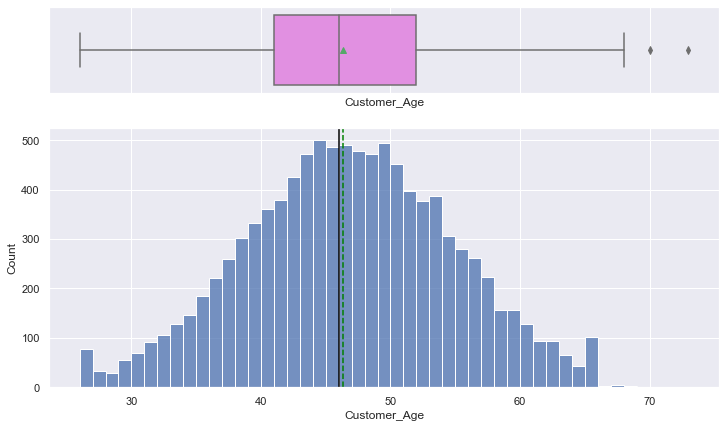

<IPython.core.display.Javascript object>

In [359]:
histogram_boxplot(data, "Customer_Age")

- Few outliers observed at the right of the whiskers of the column Customer_Age

### Observations on Dependent_count

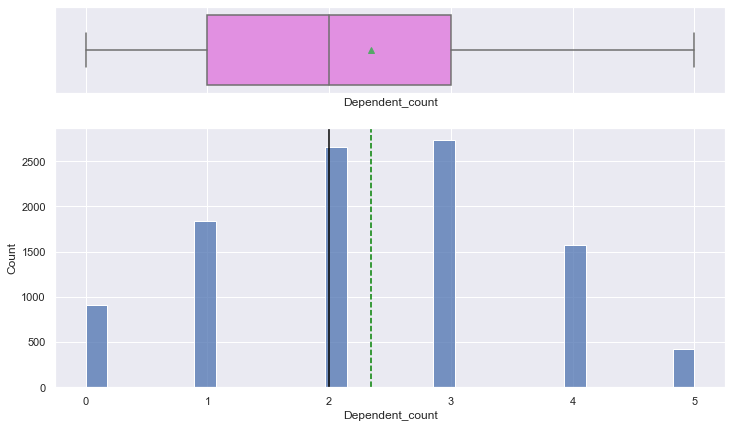

<IPython.core.display.Javascript object>

In [360]:
histogram_boxplot(data, "Dependent_count")

- The numbers are discrete. No outliers observed in the column Dependent_count

### Observations on Months_on_book

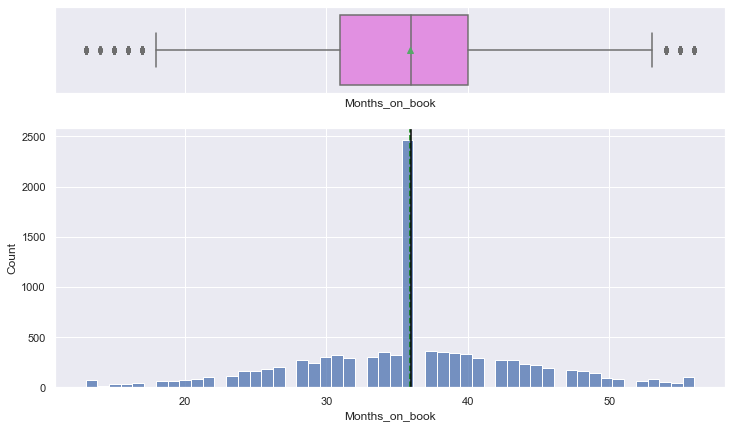

<IPython.core.display.Javascript object>

In [361]:
histogram_boxplot(data, "Months_on_book")

- Few outliers observed at the left and right sides of the whiskers of the Months_on_book

### Observations on Total_Relationship_Count

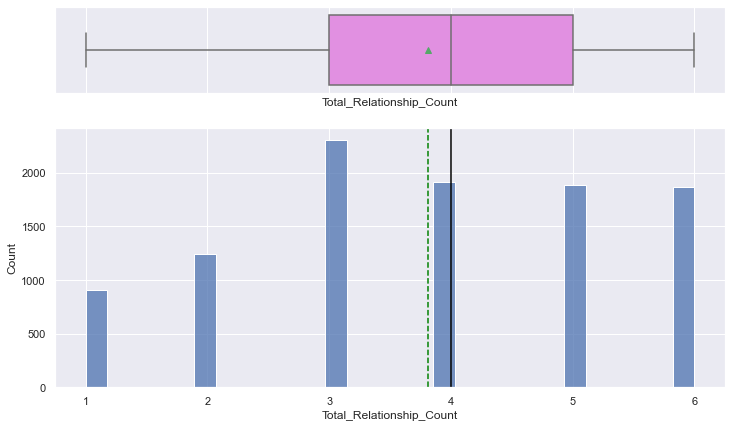

<IPython.core.display.Javascript object>

In [362]:
histogram_boxplot(data, "Total_Relationship_Count")

- No outlier observed in the column Total_Relationship_Count

### Observations on Months_Inactive_12_mon

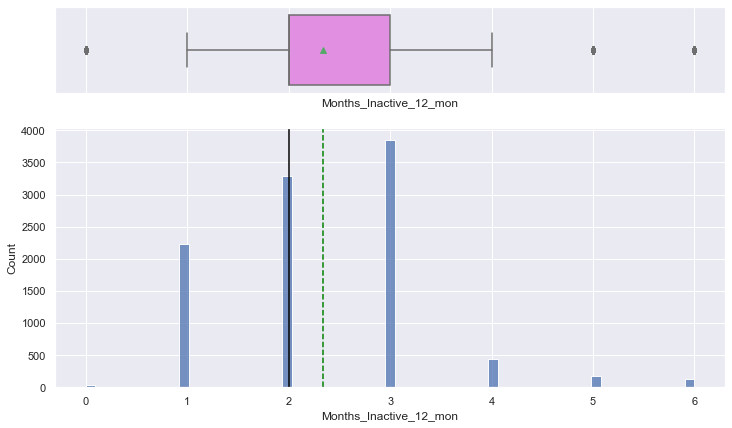

<IPython.core.display.Javascript object>

In [363]:
histogram_boxplot(data, "Months_Inactive_12_mon")

- Few outliers observed in the left and right sides of the whiskers of the column Months_Inactive_12_mon
- The most frequent number of inactive month during the is 3, followed by 2 and 1. 

### Observations on Contacts_Count_12_mon

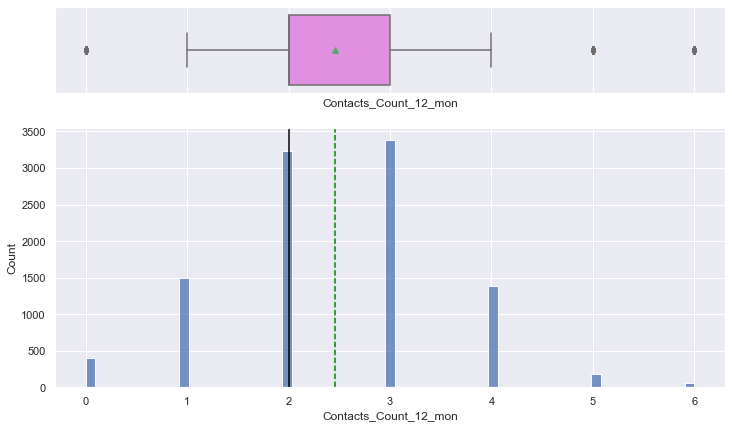

<IPython.core.display.Javascript object>

In [364]:
histogram_boxplot(data, "Contacts_Count_12_mon")

- Some outliers observed on both sides of the whiskers of the column Contacts_Count_12_mon

### Observations on Credit_Limit¶

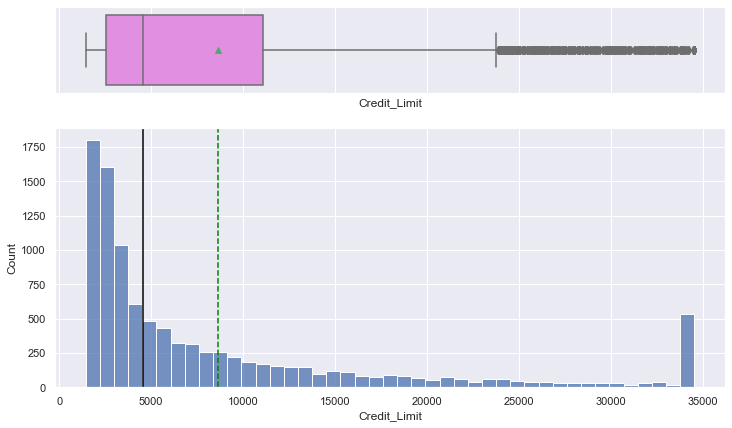

<IPython.core.display.Javascript object>

In [365]:
histogram_boxplot(data, "Credit_Limit")

- Some outliers observed in this column Credit_Limit around 24-25K

### Observations on Total_Revolving_Bal

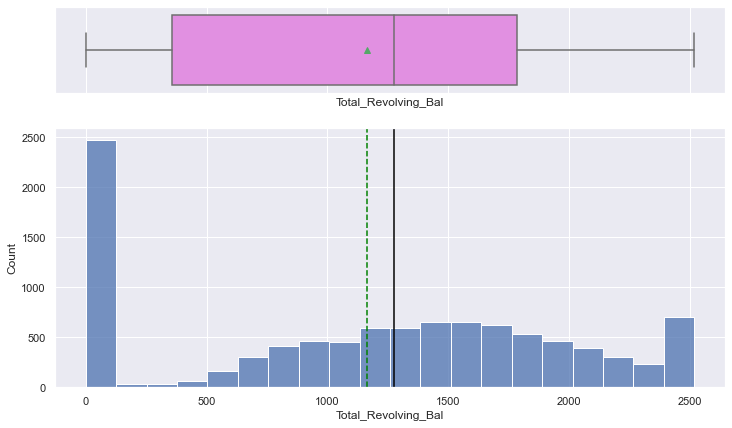

<IPython.core.display.Javascript object>

In [366]:
histogram_boxplot(data, "Total_Revolving_Bal")

- No outlier observed in the column Total_Revolving_Bal

### Observations on Avg_Open_To_Buy

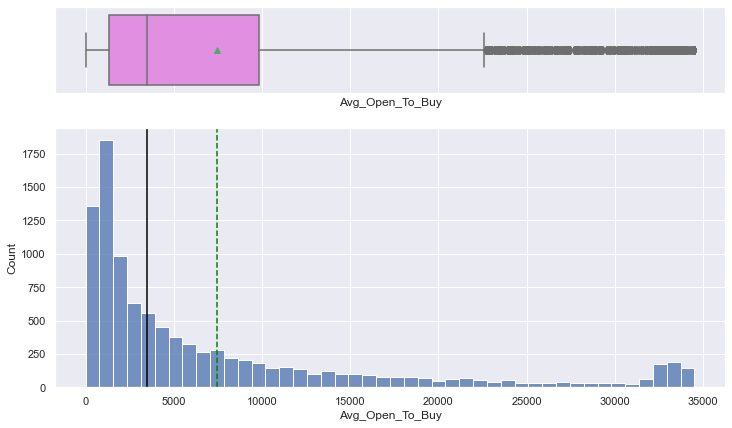

<IPython.core.display.Javascript object>

In [367]:
histogram_boxplot(data, "Avg_Open_To_Buy")

- Some outliers observed in the column Avg_Open_To_Buy around 22-23K

### Observations on Total_Amt_Chng_Q4_Q1

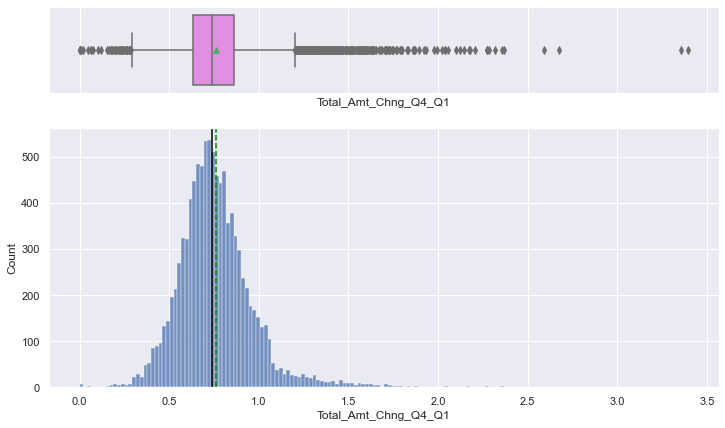

<IPython.core.display.Javascript object>

In [368]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

- Some outliers observed on both sides of the whiskers of the column Total_Amt_Chng_Q4_Q1

### Observations on Total_Trans_Amt

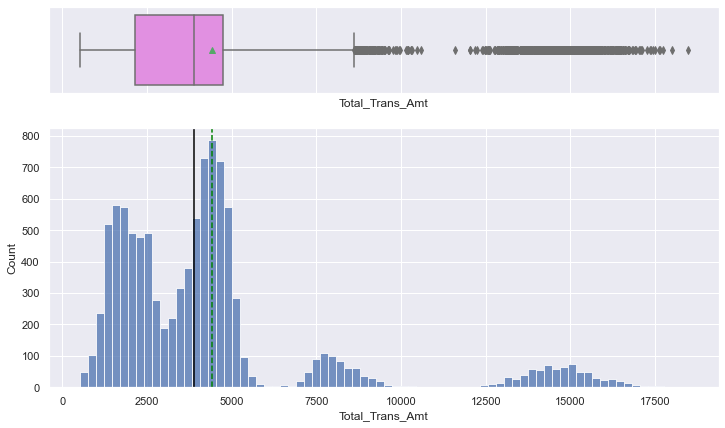

<IPython.core.display.Javascript object>

In [369]:
histogram_boxplot(data, "Total_Trans_Amt")

- Presence of some outliers at the right side of the whiskers in the column Total_Trans_Amt

### Observations on Total_Trans_Ct

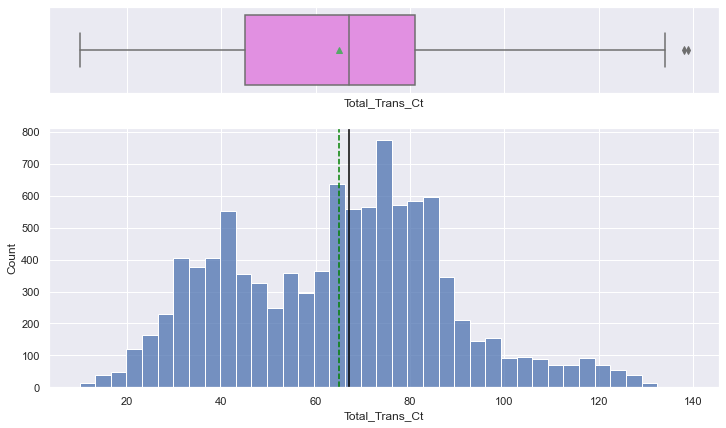

<IPython.core.display.Javascript object>

In [370]:
histogram_boxplot(data, "Total_Trans_Ct")

- Few outliers observed at the right side of the whiskers in the column Total_Trans_Ct

### Observations on Total_Ct_Chng_Q4_Q1

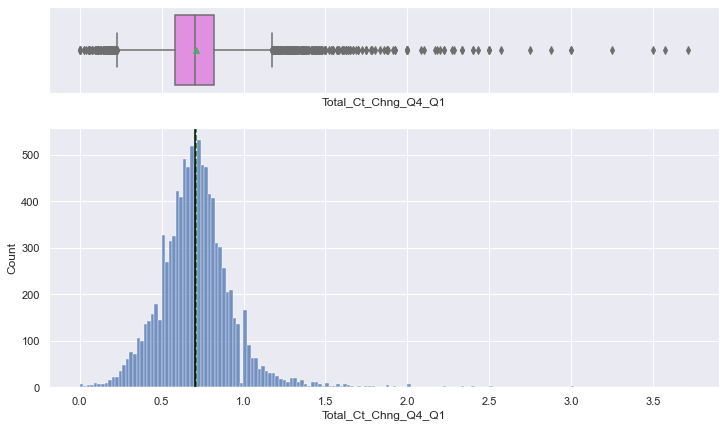

<IPython.core.display.Javascript object>

In [371]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

- Presence of some outliers at the right side of the whiskers in the column Total_Ct_Chng_Q4_Q1

### Univariate EDA on Categorical variables

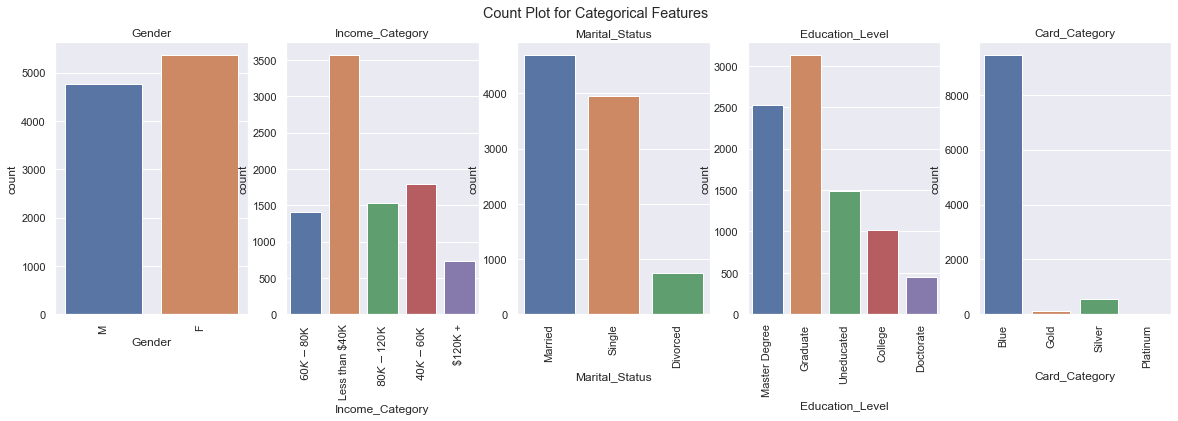

<IPython.core.display.Javascript object>

In [446]:
fig, axes = plt.subplots(1, 5)
fig.suptitle("Count Plot for Categorical Features")
sns.set(rc={"figure.figsize": (20, 5)})

sns.countplot(ax=axes[0], x=categorical_cols[0], data=data)
axes[0].set_title(categorical_cols[0])
axes[0].tick_params(axis="x", labelrotation=90)


sns.countplot(ax=axes[1], x=categorical_cols[1], data=data)
axes[1].set_title(categorical_cols[1])
axes[1].tick_params(axis="x", labelrotation=90)


sns.countplot(ax=axes[2], x=categorical_cols[2], data=data)
axes[2].set_title(categorical_cols[2])
axes[2].tick_params(axis="x", labelrotation=90)


sns.countplot(ax=axes[3], x=categorical_cols[3], data=data)
axes[3].set_title(categorical_cols[3])
axes[3].tick_params(axis="x", labelrotation=90)


sns.countplot(ax=axes[4], x=categorical_cols[4], data=data)
axes[4].set_title(categorical_cols[4])
axes[4].tick_params(axis="x", labelrotation=90)


plt.show()

####  Observations:

- Customers are in majority women. they generaly belong in the income_category 'less than 40K which is represent those with lower incomes. Most of them are married and are Graduate or High School and they mostly owne the Blue type of cards.

###   Bivariate EDA  

#### Correlation tab and pairplot

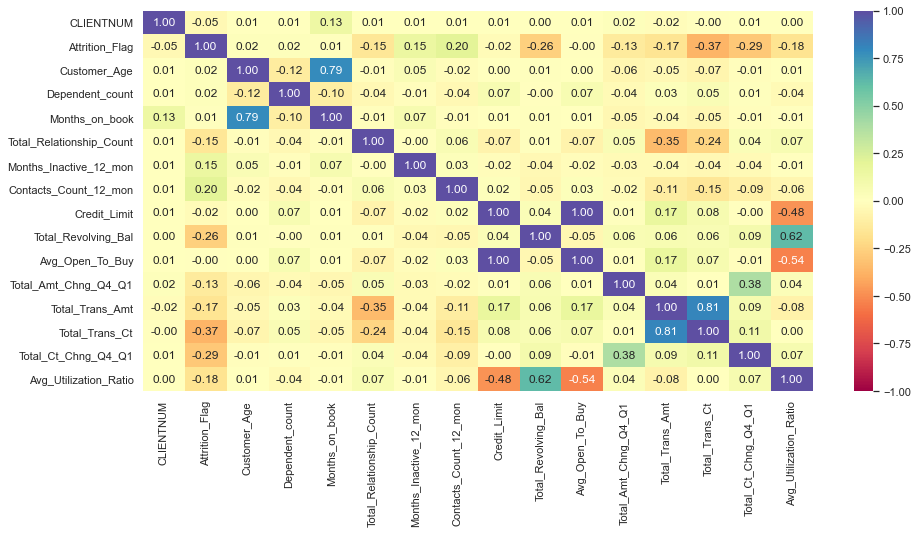

<IPython.core.display.Javascript object>

In [373]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

####  Observations 

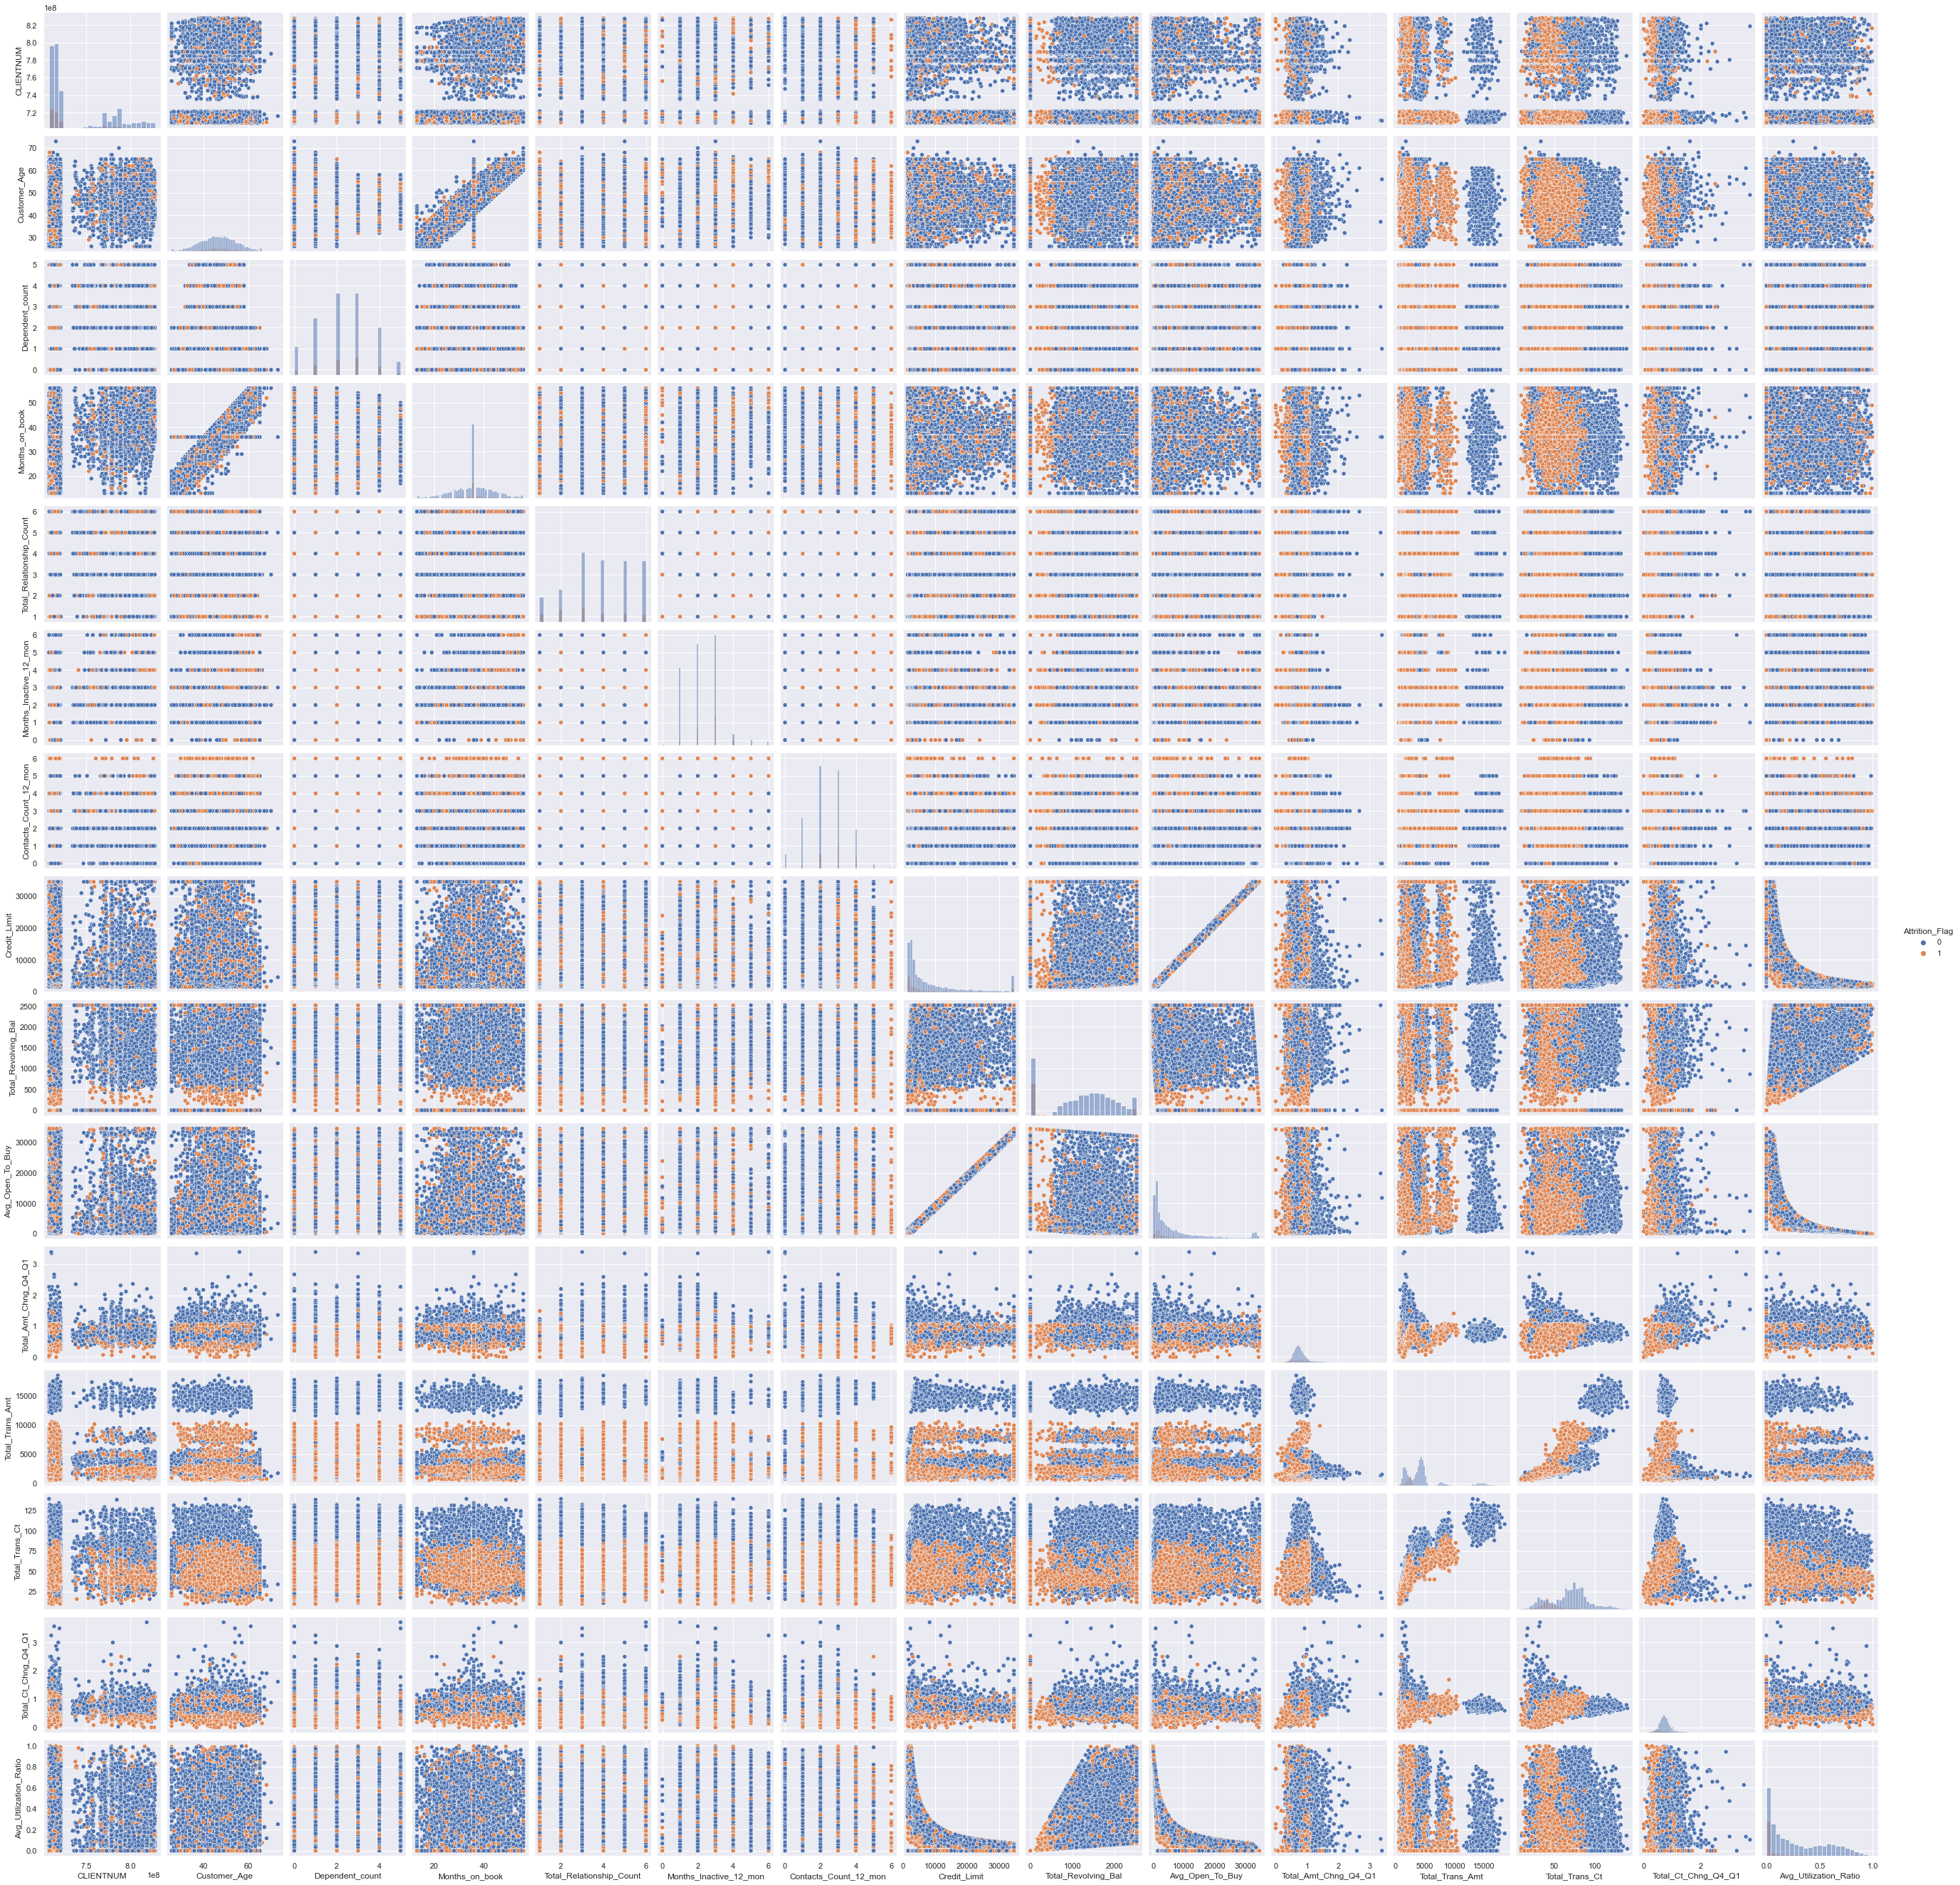

<IPython.core.display.Javascript object>

In [374]:
# Let's look at the paiplot of the data
sns.pairplot(data, hue="Attrition_Flag", diag_kind="hist")

####  Observations:

- It seems like ther is no good columns discriminate between Existing Customer and Attrited Customer.
- High linear correlation between Months_on_book and Customer_Age which means that the older people get, the stronger is their relationship with the bank is.
- Total_Revolving_Bal and Avg_Utilization_Ratio are correlated indicating that the more the revolving balance is, the more the customers spent the available credit
- Avg_Open_To_Buy and Avg_Utilization_Ratio are negatively correlated which shows that customers with high available credit to spend do not have too much amount left on the credit card
- Avg_Open_To_Buy and Credit_Limit are negatively correlated indicating that when customers have important credit limit on their cards, they spend available credits prudently
- Credit_Limit and Avg_Open_To_Buy are perfectly correlated. We have to drop one of those 2 features, in particular Avg_Open_To_Buy
- From the pairplot, we can observed that we have other kind of correlations than linear correlations 

**Let's check the relationship between Attrition_Flag and Numerical variables**

In [375]:
# Mean of numerical variables grouped by attrition
data.groupby(["Attrition_Flag"])[numerical_cols].mean()

Customer_Age  Dependent_count  Months_on_book  \
Attrition_Flag                                                  
0                     46.262            2.335          35.881   
1                     46.659            2.403          36.178   

                Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                     
0                                  3.915                   2.274   
1                                  3.280                   2.693   

                Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Attrition_Flag                                                             
0                               2.356      8726.878             1256.604   
1                               2.972      8136.039              672.823   

                Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
Attrition_Flag                                                           
0                      7470.273                 0.773         4654.656   
1                      7463.216                 0.694         3095.026   

                Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                                              
0                       68.673                0.742                  0.296  
1                       44.934                0.554                  0.162

<IPython.core.display.Javascript object>

####  Observations:

* People with a lower Total no. of products held are more likely to abandon the credit card's services
* People who have the higher age, number of dependents, period of relationship with the bank, No. of months inactive and No. of Contacts are more likely to turn down the credit card's services
* People who have lower Credit_Limit are more likely to leave the credit card's services
* People with less revolving balance are more likely to opt out of credit card's services
* Customers with the less ratios of total transactions amount in the 4th and 1st quarters are more likely to attrite
* Customers with the smallest total transactions amount and total transactions count are more likely to not keep the credit card's services 
* People with the less ratios of total transactions count in the 4th and 1st quarters are more likely to leave the credit card's services
* People who spend the less the available credit are more likely to attrite
 

**Let's check the relationship between Attrition_Flag and Categorical variables**

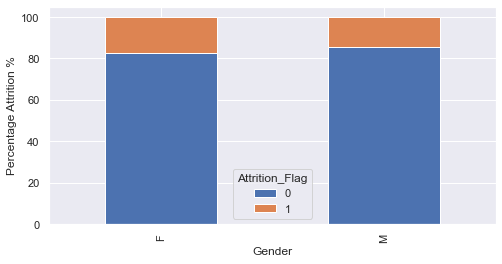

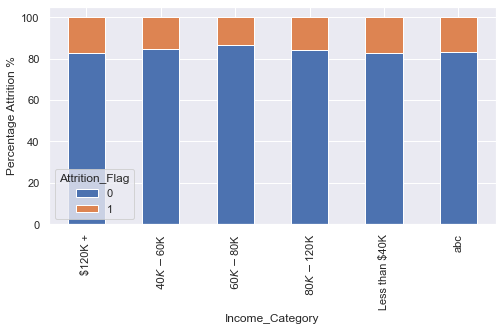

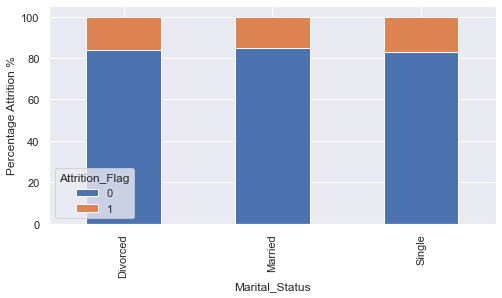

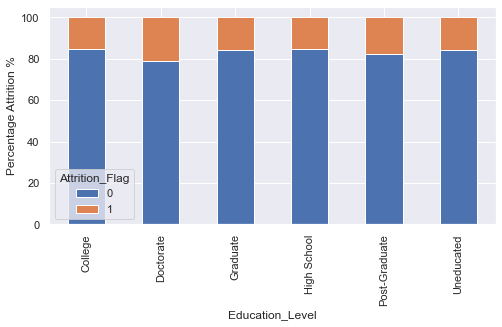

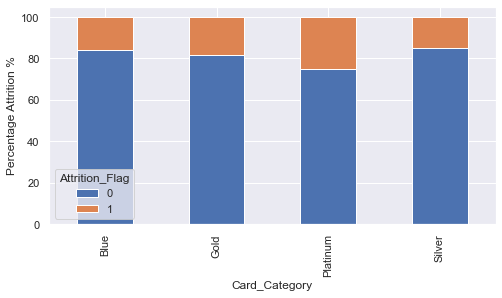

<IPython.core.display.Javascript object>

In [376]:
for i in categorical_cols:
    if i != "Attrition_Flag":
        (pd.crosstab(data[i], data["Attrition_Flag"], normalize="index") * 100).plot(
            kind="bar", figsize=(8, 4), stacked=True
        )
        plt.ylabel("Percentage Attrition %")

####  Observations

- Female are more likely to churn than Male
- People with income category 60k-80K leave credit cards services less than others, followed by those in categories 40K-60K and 80K-120K
- In the column `Income_Category`, we have some values abc which does not mean anything in terms of income. We'll consider those values as missing values.
- Married customers churn more than Divorce and Single customers but the gap is not that much
- People with Doctorate and Post-Graduate level of education leave credit cards services more than others
- Customers with Platinium Card_Category churn much more than those with Gold and Blue. People with Silver card leave the credit card services the less

**Extracting more relevant insights in data by running a customer profiling**

In [377]:
# Mean of numerical variables grouped by attrition ==> Platinum
platinum = data[data["Card_Category"] == "Platinum"]

platinum.groupby(["Attrition_Flag"])[numerical_cols].mean()

Customer_Age  Dependent_count  Months_on_book  \
Attrition_Flag                                                  
0                     46.867            2.533          36.333   
1                     49.400            2.200          36.000   

                Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                     
0                                  2.133                   2.133   
1                                  2.800                   2.600   

                Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Attrition_Flag                                                             
0                               2.267     32045.467             1602.800   
1                               3.200     24997.400              263.400   

                Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
Attrition_Flag                                                           
0                     30442.667                 0.779        10414.400   
1                     24734.000                 0.785         4755.800   

                Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                                              
0                       95.867                0.706                  0.055  
1                       60.200                0.546                  0.010

<IPython.core.display.Javascript object>

 - Customers whith higher `Customer_Age`, `Months_Inactive_12_mon` and `Contacts_Count_12_mon` are more likely to leave the platinum credit card's services
 - Customers whith lower `Credit_Limit`, `Total_Revolving_Bal`, `Avg_Open_To_Buy`, `Total_Trans_Amt`, `Total_Trans_Ct` and `Avg_Utilization_Ratio` are more likely to leave the platinum credit card's services

In [378]:
# Customers with platinum cards category
data[(data["Card_Category"] == "Platinum") & (data["Attrition_Flag"] == 1)].describe(
    include="all"
).T

count unique       top freq          mean  \
CLIENTNUM                5.000    NaN       NaN  NaN 713062863.000   
Attrition_Flag           5.000    NaN       NaN  NaN         1.000   
Customer_Age             5.000    NaN       NaN  NaN        49.400   
Gender                       5      2         F    4           NaN   
Dependent_count          5.000    NaN       NaN  NaN         2.200   
Education_Level              5      3  Graduate    3           NaN   
Marital_Status               5      2    Single    3           NaN   
Income_Category              5      3       abc    2           NaN   
Card_Category                5      1  Platinum    5           NaN   
Months_on_book           5.000    NaN       NaN  NaN        36.000   
Total_Relationship_Count 5.000    NaN       NaN  NaN         2.800   
Months_Inactive_12_mon   5.000    NaN       NaN  NaN         2.600   
Contacts_Count_12_mon    5.000    NaN       NaN  NaN         3.200   
Credit_Limit             5.000    NaN       NaN  NaN     24997.400   
Total_Revolving_Bal      5.000    NaN       NaN  NaN       263.400   
Avg_Open_To_Buy          5.000    NaN       NaN  NaN     24734.000   
Total_Amt_Chng_Q4_Q1     5.000    NaN       NaN  NaN         0.785   
Total_Trans_Amt          5.000    NaN       NaN  NaN      4755.800   
Total_Trans_Ct           5.000    NaN       NaN  NaN        60.200   
Total_Ct_Chng_Q4_Q1      5.000    NaN       NaN  NaN         0.546   
Avg_Utilization_Ratio    5.000    NaN       NaN  NaN         0.010   

                                 std           min           25%  \
CLIENTNUM                4238022.852 708654933.000 709319658.000   
Attrition_Flag                 0.000         1.000         1.000   
Customer_Age                   4.159        43.000        48.000   
Gender                           NaN           NaN           NaN   
Dependent_count                1.483         0.000         2.000   
Education_Level                  NaN           NaN           NaN   
Marital_Status                   NaN           NaN           NaN   
Income_Category                  NaN           NaN           NaN   
Card_Category                    NaN           NaN           NaN   
Months_on_book                 4.528        31.000        32.000   
Total_Relationship_Count       1.304         2.000         2.000   
Months_Inactive_12_mon         0.548         2.000         2.000   
Contacts_Count_12_mon          0.837         2.000         3.000   
Credit_Limit                9281.907     15987.000     15987.000   
Total_Revolving_Bal          284.588         0.000         0.000   
Avg_Open_To_Buy             9212.951     15794.000     15987.000   
Total_Amt_Chng_Q4_Q1           0.230         0.435         0.695   
Total_Trans_Amt             2073.953      2021.000      3901.000   
Total_Trans_Ct                10.035        46.000        54.000   
Total_Ct_Chng_Q4_Q1            0.148         0.394         0.421   
Avg_Utilization_Ratio          0.011         0.000         0.000   

                                   50%           75%           max  
CLIENTNUM                714077583.000 714190983.000 719071158.000  
Attrition_Flag                   1.000         1.000         1.000  
Customer_Age                    51.000        51.000        54.000  
Gender                             NaN           NaN           NaN  
Dependent_count                  2.000         3.000         4.000  
Education_Level                    NaN           NaN           NaN  
Marital_Status                     NaN           NaN           NaN  
Income_Category                    NaN           NaN           NaN  
Card_Category                      NaN           NaN           NaN  
Months_on_book                  37.000        38.000        42.000  
Total_Relationship_Count         2.000         3.000         5.000  
Months_Inactive_12_mon           3.000         3.000         3.000  
Contacts_Count_12_mon            3.000         4.000         4.000  
Credit_Limit         

<IPython.core.display.Javascript object>

#### Observations:
- Customers with Platinum cards category are very few (20 persons) and 1/4 of them have left the credit card's services. 
- Those 5 people who attrite the service cards are aged between 43 and 54 years old. Among them, 4 was women.
- Most of them are single and belong to the income categories below 60K dollars.
- They are graduate (most of them), Master Degree and Doctorate
- Their credit limit is between 15987 and 34516 dollars
- The Months_on_book is between 31 and 42 months
- They held between 2 and 5 Total no. of products (Total_Relationship_Count). 3 people who renounced to their credit cards held 2 products, 1 held 3 products and the last person had 5 services
- They have been inactive (Months_Inactive_12_mon) between 2 and 3 months suring the last 12 months 
- They have been maximum 4 times in contact with the bank during the last 12 months (Contacts_Count_12_mon)
- The Total_Revolving_Bal of the 5 Platinum customers is between 0 and 593 dollars
- The Avg_Utilization_Ratio (the ratio of the available credit the customer spent) in this group is 0 for 2 customers. The maximum of this Avg_Utilization_Ratio 2.5%

In [379]:
# Mean of numerical variables grouped by attrition ==> Gold
gold = data[data["Card_Category"] == "Gold"]

gold.groupby(["Attrition_Flag"])[numerical_cols].mean()

Customer_Age  Dependent_count  Months_on_book  \
Attrition_Flag                                                  
0                     45.789            2.695          35.884   
1                     43.857            2.571          33.905   

                Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                     
0                                  3.000                   2.242   
1                                  3.048                   2.619   

                Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Attrition_Flag                                                             
0                               2.326     28093.158             1414.463   
1                               3.000     29878.524             1027.000   

                Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
Attrition_Flag                                                           
0                     26678.695                 0.773         8093.189   
1                     28851.524                 0.770         5841.810   

                Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                                              
0                       86.305                0.725                  0.062  
1                       59.857                0.619                  0.036

<IPython.core.display.Javascript object>

- Customers whith lower `Customer_Age`, `Months_on_book`, `Total_Revolving_Bal`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Total_Ct_Chng_Q4_Q1` and `Avg_Utilization_Ratio` are more likely to leave the gold credit card's services
- Customers with higher `Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Credit_Limit`, `Avg_Open_To_Bu`y are more likely to leave the gold credit card's services

In [380]:
# Customers with Gold cards category
data[(data["Card_Category"] == "Gold") & (data["Attrition_Flag"] == 1)].describe(
    include="all"
).T

count unique          top freq          mean  \
CLIENTNUM                21.000    NaN          NaN  NaN 731791633.000   
Attrition_Flag           21.000    NaN          NaN  NaN         1.000   
Customer_Age             21.000    NaN          NaN  NaN        43.857   
Gender                       21      2            M   13           NaN   
Dependent_count          21.000    NaN          NaN  NaN         2.571   
Education_Level              17      6     Graduate    6           NaN   
Marital_Status               17      2       Single   11           NaN   
Income_Category              21      6  $60K - $80K    6           NaN   
Card_Category                21      1         Gold   21           NaN   
Months_on_book           21.000    NaN          NaN  NaN        33.905   
Total_Relationship_Count 21.000    NaN          NaN  NaN         3.048   
Months_Inactive_12_mon   21.000    NaN          NaN  NaN         2.619   
Contacts_Count_12_mon    21.000    NaN          NaN  NaN         3.000   
Credit_Limit             21.000    NaN          NaN  NaN     29878.524   
Total_Revolving_Bal      21.000    NaN          NaN  NaN      1027.000   
Avg_Open_To_Buy          21.000    NaN          NaN  NaN     28851.524   
Total_Amt_Chng_Q4_Q1     21.000    NaN          NaN  NaN         0.770   
Total_Trans_Amt          21.000    NaN          NaN  NaN      5841.810   
Total_Trans_Ct           21.000    NaN          NaN  NaN        59.857   
Total_Ct_Chng_Q4_Q1      21.000    NaN          NaN  NaN         0.619   
Avg_Utilization_Ratio    21.000    NaN          NaN  NaN         0.036   

                                  std           min           25%  \
CLIENTNUM                37780118.509 708369633.000 712509108.000   
Attrition_Flag                  0.000         1.000         1.000   
Customer_Age                    6.223        32.000        41.000   
Gender                            NaN           NaN           NaN   
Dependent_count                 1.287         0.000         2.000   
Education_Level                   NaN           NaN           NaN   
Marital_Status                    NaN           NaN           NaN   
Income_Category                   NaN           NaN           NaN   
Card_Category                     NaN           NaN           NaN   
Months_on_book                  6.156        20.000        32.000   
Total_Relationship_Count        1.687         1.000         2.000   
Months_Inactive_12_mon          0.590         1.000         2.000   
Contacts_Count_12_mon           1.378         1.000         2.000   
Credit_Limit                 7832.307     15109.000     23981.000   
Total_Revolving_Bal          1009.462         0.000         0.000   
Avg_Open_To_Buy              7757.525     13640.000     23981.000   
Total_Amt_Chng_Q4_Q1            0.256         0.196         0.591   
Total_Trans_Amt              2836.813      1727.000      2315.000   
Total_Trans_Ct                 14.402        34.000        47.000   
Total_Ct_Chng_Q4_Q1             0.201         0.214         0.478   
Avg_Utilization_Ratio           0.035         0.000         0.000   

                                   50%           75%           max  
CLIENTNUM                715645908.000 719874633.000 817607358.000  
Attrition_Flag                   1.000         1.000         1.000  
Customer_Age                    44.000        47.000        59.000  
Gender                             NaN           NaN           NaN  
Dependent_count                  2.000         4.000         5.000  
Education_Level                    NaN           NaN           NaN  
Marital_Status                     NaN           NaN           NaN  
Income_Category                    NaN           NaN           NaN  
Card_Category                      NaN           NaN           NaN  
Months_on_book                  36.000        36.000        48.000  
Total_Relationship_Count         2.000         4.000         6.000  
Months_Inactive_12_mon           3.000         3.0

<IPython.core.display.Javascript object>

#### Observations:
- Customers with Gold cards category are around 116 persons and 21 (18%) of them have left the credit card's services. 
- Those 21 people who attrite the service cards are aged between 32 and 59 years old. Among them, 13 was men.
- Most of them are single, followed by married. Most of these attrited customers (13) belong to the income categories around $ 60K+ .
- At least 12 of them are are graduate (most of them), Master Degree and Doctorate.
- Their credit limit is a little tighter but keep the same upper limit than the Platinum customers who attrited, from 29878 and 34516 dollars.
- The Months_on_book is between 20 and 48 months. The gap between the two limits is widening compared to that of platinum customers who stopped using the services offered by the bank card
- They held between 1 and 6 Total no. of products (Total_Relationship_Count). 2 products are more frequent in this group. 1 - 3 and 6 products are held by 3 persons each.
- They have been inactive (Months_Inactive_12_mon) between 1 and 3 months suring the last 12 months 
- They have been maximum 6 times in contact with the bank during the last 12 months (Contacts_Count_12_mon)
- The Total_Revolving_Bal of 8 Gold customers is 0 dollar. 9 of them have a revolving balance between 532 and 2201 dollars.
- The Avg_Utilization_Ratio (the ratio of the available credit the customer spent) in this group is 0 for 8 customers. The maximum of this Avg_Utilization_Ratio 11.9%


In [381]:
# Mean of numerical variables grouped by attrition ==> Silver
silver = data[data["Card_Category"] == "Silver"]

silver.groupby(["Attrition_Flag"])[numerical_cols].mean()

Customer_Age  Dependent_count  Months_on_book  \
Attrition_Flag                                                  
0                     45.423            2.423          35.294   
1                     47.159            2.537          36.366   

                Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                     
0                                  3.471                   2.209   
1                                  3.134                   2.646   

                Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Attrition_Flag                                                             
0                               2.349     25159.529             1297.818   
1                               3.037     25960.268              677.244   

                Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
Attrition_Flag                                                           
0                     23861.710                 0.772         6883.603   
1                     25283.024                 0.706         4899.683   

                Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                                              
0                       78.414                0.726                  0.062  
1                       53.280                0.613                  0.032

<IPython.core.display.Javascript object>

- Customers whith lower `Total_Relationship_Count`, `Total_Revolving_Bal`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Total_Ct_Chng_Q4_Q1` and `Avg_Utilization_Ratio` are more likely to leave the silver credit card's services
- Customers with higher `Customer_Age`, `Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Credit_Limit` and `Avg_Open_To_Buy` are more likely to leave the silver credit card's services

In [382]:
# Customers with Silver cards category
data[(data["Card_Category"] == "Silver") & (data["Attrition_Flag"] == 1)].describe(
    include="all"
).T

count unique           top freq          mean  \
CLIENTNUM                82.000    NaN           NaN  NaN 744344514.402   
Attrition_Flag           82.000    NaN           NaN  NaN         1.000   
Customer_Age             82.000    NaN           NaN  NaN        47.159   
Gender                       82      2             M   54           NaN   
Dependent_count          82.000    NaN           NaN  NaN         2.537   
Education_Level              73      6      Graduate   28           NaN   
Marital_Status               77      3        Single   43           NaN   
Income_Category              82      6  $80K - $120K   22           NaN   
Card_Category                82      1        Silver   82           NaN   
Months_on_book           82.000    NaN           NaN  NaN        36.366   
Total_Relationship_Count 82.000    NaN           NaN  NaN         3.134   
Months_Inactive_12_mon   82.000    NaN           NaN  NaN         2.646   
Contacts_Count_12_mon    82.000    NaN           NaN  NaN         3.037   
Credit_Limit             82.000    NaN           NaN  NaN     25960.268   
Total_Revolving_Bal      82.000    NaN           NaN  NaN       677.244   
Avg_Open_To_Buy          82.000    NaN           NaN  NaN     25283.024   
Total_Amt_Chng_Q4_Q1     82.000    NaN           NaN  NaN         0.706   
Total_Trans_Amt          82.000    NaN           NaN  NaN      4899.683   
Total_Trans_Ct           82.000    NaN           NaN  NaN        53.280   
Total_Ct_Chng_Q4_Q1      82.000    NaN           NaN  NaN         0.613   
Avg_Utilization_Ratio    82.000    NaN           NaN  NaN         0.032   

                                  std           min           25%  \
CLIENTNUM                39531847.495 708385533.000 712961414.250   
Attrition_Flag                  0.000         1.000         1.000   
Customer_Age                    7.471        30.000        42.250   
Gender                            NaN           NaN           NaN   
Dependent_count                 1.335         0.000         2.000   
Education_Level                   NaN           NaN           NaN   
Marital_Status                    NaN           NaN           NaN   
Income_Category                   NaN           NaN           NaN   
Card_Category                     NaN           NaN           NaN   
Months_on_book                  7.721        18.000        33.000   
Total_Relationship_Count        1.727         1.000         2.000   
Months_Inactive_12_mon          0.921         0.000         2.000   
Contacts_Count_12_mon           1.116         1.000         2.000   
Credit_Limit                10054.778      3735.000     14890.000   
Total_Revolving_Bal           894.665         0.000         0.000   
Avg_Open_To_Buy             10072.892      3735.000     14023.750   
Total_Amt_Chng_Q4_Q1            0.244         0.000         0.552   
Total_Trans_Amt              3140.824       691.000      1929.500   
Total_Trans_Ct                 17.497        14.000        41.000   
Total_Ct_Chng_Q4_Q1             0.249         0.000         0.435   
Avg_Utilization_Ratio           0.052         0.000         0.000   

                                   50%           75%           max  
CLIENTNUM                718639608.000 786053714.250 826245858.000  
Attrition_Flag                   1.000         1.000         1.000  
Customer_Age                    48.000        52.000        65.000  
Gender                             NaN           NaN           NaN  
Dependent_count                  3.000         3.750         5.000  
Education_Level                    NaN           NaN           NaN  
Marital_Status                     NaN           NaN           NaN  
Income_Category                    NaN           NaN           NaN  
Card_Category                      NaN           NaN           NaN  
Months_on_book                  36.000        42.750        56.000  
Total_Relationship_Count         3.000         4.750         6.000  
Months_Inactive_12_mon      

<IPython.core.display.Javascript object>

#### Observations:
- Customers with Silver cards category are around 555 persons and 82 (14.8%) of them have left the credit card's services. 
- Those 82 people who attrited the service cards are aged between 30 and 65 years old. Among them, 54 was men.
- Most of them are single (56%), followed by married (35%) and divorced customers. Most of these attrited customers (44%) belong to the income categories around $ 80K+ dollars. They are 59% to     be in the   income category 60K+ dollars.
- At least 28 of them are are graduate (most of them), Master Degree (22) and Doctorate (2).
- The cap of their credit upper limit is the same than Gold customers who attrited 34516 dollars, but the magnitude is greater as it starts at 25960 dollars. 
- The Months_on_book is between 18 and 56 months. The gap between the two limits is widening compared to that of Gold customers who stopped using the services offered by the bank card
- They held between 1 and 6 Total no. of products (Total_Relationship_Count). 2 products are more frequent in this group. 1 - 4 and 6 products are held by 12 persons each.
- They have been inactive (Months_Inactive_12_mon) between 0 and 5 months suring the last 12 months 
- They have been maximum 6 times in contact with the bank during the last 12 months (Contacts_Count_12_mon)
- The Total_Revolving_Bal of 40 Silver customers is 0 dollar. 6 of them have a revolving balance equal to 2517 dollars. The revolving balance of the others people who attrited in this group is between 154 and 2418 dollars.
- The Avg_Utilization_Ratio (the ratio of the available credit the customer spent) in this group is 0 for 40 customers. The maximum of this Avg_Utilization_Ratio 23.4%

In [383]:
# Mean of numerical variables grouped by attrition ==> Blue
blue = data[data["Card_Category"] == "Blue"]

blue.groupby(["Attrition_Flag"])[numerical_cols].mean()

Customer_Age  Dependent_count  Months_on_book  \
Attrition_Flag                                                  
0                     46.317            2.326          35.915   
1                     46.662            2.394          36.200   

                Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                     
0                                  3.955                   2.278   
1                                  3.292                   2.697   

                Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Attrition_Flag                                                             
0                               2.357      7468.545             1251.592   
1                               2.968      6817.747              669.036   

                Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
Attrition_Flag                                                           
0                      6216.953                 0.773         4469.314   
1                      6148.712                 0.692         2954.165   

                Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                                              
0                       67.827                0.744                  0.314  
1                       44.226                0.550                  0.172

<IPython.core.display.Javascript object>

- Customers whith lower `Total_Relationship_Count`, `Credit_Limit`, `Avg_Open_To_Buy`, `Total_Trans_Amt`, `Total_Trans_Ct` and `Avg_Utilization_Ratio` are more likely to leave the gold credit card's services
- Customers with higher `Months_on_book`, `Contacts_Count_12_mon` and `Total_Revolving_Bal` are more likely to leave the gold credit card's services

In [384]:
# Customers with Blue cards category
data[(data["Card_Category"] == "Blue") & (data["Attrition_Flag"] == 1)].describe(
    include="all"
).T

count unique             top  freq          mean  \
CLIENTNUM                1519.000    NaN             NaN   NaN 734892085.930   
Attrition_Flag           1519.000    NaN             NaN   NaN         1.000   
Customer_Age             1519.000    NaN             NaN   NaN        46.662   
Gender                       1519      2               F   890           NaN   
Dependent_count          1519.000    NaN             NaN   NaN         2.394   
Education_Level              1276      6        Graduate   450           NaN   
Marital_Status               1399      3         Married   674           NaN   
Income_Category              1519      6  Less than $40K   586           NaN   
Card_Category                1519      1            Blue  1519           NaN   
Months_on_book           1519.000    NaN             NaN   NaN        36.200   
Total_Relationship_Count 1519.000    NaN             NaN   NaN         3.292   
Months_Inactive_12_mon   1519.000    NaN             NaN   NaN         2.697   
Contacts_Count_12_mon    1519.000    NaN             NaN   NaN         2.968   
Credit_Limit             1519.000    NaN             NaN   NaN      6817.747   
Total_Revolving_Bal      1519.000    NaN             NaN   NaN       669.036   
Avg_Open_To_Buy          1519.000    NaN             NaN   NaN      6148.712   
Total_Amt_Chng_Q4_Q1     1519.000    NaN             NaN   NaN         0.692   
Total_Trans_Amt          1519.000    NaN             NaN   NaN      2954.165   
Total_Trans_Ct           1519.000    NaN             NaN   NaN        44.226   
Total_Ct_Chng_Q4_Q1      1519.000    NaN             NaN   NaN         0.550   
Avg_Utilization_Ratio    1519.000    NaN             NaN   NaN         0.172   

                                  std           min           25%  \
CLIENTNUM                35315283.846 708083283.000 712311483.000   
Attrition_Flag                  0.000         1.000         1.000   
Customer_Age                    7.698        26.000        41.000   
Gender                            NaN           NaN           NaN   
Dependent_count                 1.272         0.000         1.000   
Education_Level                   NaN           NaN           NaN   
Marital_Status                    NaN           NaN           NaN   
Income_Category                   NaN           NaN           NaN   
Card_Category                     NaN           NaN           NaN   
Months_on_book                  7.830        13.000        32.000   
Total_Relationship_Count        1.569         1.000         2.000   
Months_Inactive_12_mon          0.903         0.000         2.000   
Contacts_Count_12_mon           1.086         0.000         2.000   
Credit_Limit                 7470.188      1438.300      2004.500   
Total_Revolving_Bal           922.333         0.000         0.000   
Avg_Open_To_Buy              7500.487         3.000      1520.500   
Total_Amt_Chng_Q4_Q1            0.213         0.000         0.544   
Total_Trans_Amt              2180.365       510.000      1896.000   
Total_Trans_Ct                 14.138        10.000        37.000   
Total_Ct_Chng_Q4_Q1             0.226         0.000         0.400   
Avg_Utilization_Ratio           0.271         0.000         0.000   

                                   50%           75%           max  
CLIENTNUM                716425833.000 767611120.500 828294933.000  
Attrition_Flag                   1.000         1.000         1.000  
Customer_Age                    47.000        52.000        68.000  
Gender                             NaN           NaN           NaN  
Dependent_count                  2.000         3.000         5.000  
Education_Level                    NaN           NaN           NaN  
Marital_Status                     NaN           NaN           NaN  
Income_Category                    NaN           NaN           NaN  
Card_Category                      NaN           NaN           NaN  
Months_on_book                  36.000        40.000      

<IPython.core.display.Javascript object>

#### Observations:
- Customers with Blue cards category are around 9436 persons and 1519 (16.1%) of them have left the credit card's services. This product is intended for the popular mass.
- Those 1519 people who attrited the service cards are aged between 26 and 68 years old. Among them, 890 (59%) was women.
- Most of them are both married (48%) and single (44%), followed by divorced customers. Most of these attrited customers (44%) belong to the income categories less than 40K dollars. They are 63%   to be in the income category less than 60K dollars.
- At least 450 of them are are graduate (most of them), Master Degree and Doctorate (370) and Doctorate (91).
- The cap of their credit upper limit is the same than Silver customers who attrited 34516 dollars, but the magnitude is greater as it starts at 1438 dollars. 
- The Months_on_book is between 32 and 56 months. The gap between the two limits is tighter compared to that of Silver customers who stopped using the services offered by the bank card
- They held between 1 and 6 Total no. of products (Total_Relationship_Count). 3 products are more frequent in this group. 2 - 5 and 1 products are held by around 250 persons each in average.
- They have been inactive (Months_Inactive_12_mon) between 0 and 6 months suring the last 12 months 
- They have been maximum 6 times in contact with the bank during the last 12 months (Contacts_Count_12_mon). 3 is the most frequent number of contact (634 customers)
- The Total_Revolving_Bal of 843 Blue customers is 0 dollar.
- The Avg_Utilization_Ratio (the ratio of the available credit the customer spent) in this group is 0 for 843 customers. The maximum of this Avg_Utilization_Ratio 99.9%

**Let's go ahead and do some data processing before building the models.**

### Data pre-processing

- We can drop the column - `CLIENTNUM` as it is unique for each customer and Avg_Open_To_Buy as it is highly correlated with Credit_Limit column. Those columns will not add value to the model.

In [385]:
# Dropping column - ID
data.drop(columns=["CLIENTNUM", "Avg_Open_To_Buy"], inplace=True)

<IPython.core.display.Javascript object>

**Outliers treatment**

- We will not treat the outliers in this use case because they are current bank operating data whose customer profiles are very different. Admittedly, there are significant differences between the values of certain features, but they are not shocking and are representative of the business of banks. We'll use the figures as they have been given.

**We can replace the category abc in Income_Category column with NaN values**

In [386]:
# Replacint values abc with NaN values
data["Income_Category"] = data["Income_Category"].replace(["abc"], np.nan)

<IPython.core.display.Javascript object>

**We can replace some categories in Education_Level column**

In [387]:
data["Education_Level"] = data["Education_Level"].replace(
    ["High School", "Post-Graduate",], "Master Degree"
)

<IPython.core.display.Javascript object>

In [388]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [389]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "Education_Level",
    "Marital_Status",
    "Income_Category",
]

<IPython.core.display.Javascript object>

In [390]:
# displaying the five first rows of the columns to impute
data[reqd_col_for_impute].head()

Education_Level Marital_Status Income_Category
0   Master Degree        Married     $60K - $80K
1        Graduate         Single  Less than $40K
2        Graduate        Married    $80K - $120K
3   Master Degree            NaN  Less than $40K
4      Uneducated        Married     $60K - $80K

<IPython.core.display.Javascript object>

In [391]:
# Copy of the dataset
df = data.copy()

<IPython.core.display.Javascript object>

### Missing-Value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.




### EDA summary

* There are 10127 rows and 21 columns. 
* All the columns have 10127 non-null values except Education_Level column and Marital_Status column which indicate that there are null values in those columns and we need to treat these missing values. 
- There are 6 columns which are object type and 15 columns which are numerical type

- There are no duplicated rows in the dataset
- Education_Level column has 15% missing values and Marital_Status column has 7.4% missing values. We will further explore to treat them.

**Statistical summary - Numerical data**

- The `Customer_Age` column looks almost normal distributed with a slight right skewness as the mean is a little bit greater than the median. No outlier noticed as the values are compact and grouped.
- 25% of the column `Dependent_count` is 1. Which means that 1/4 of the customers of the bank has 1 dependent. The columns is right skewed. The maximum of dependents is 5 and the minimum is 1
- The column `Months_on_book` is almost normal distributed with a slight left skew. Most of the customers have more than 35 months of relationship with the bank
- The column `Total_Relationship_Count` is left skewed.
- The column `Months_Inactive_12_mon` is right skewed. Most of the customers have a No. of months inactive in the last 12 months which is not greater than 2.341 months
- The column `Contacts_Count_12_mon` is also right skewed. The majority of the customers have a No. of Contacts with the bank in the last 12 months between 0 and 2.455 
- There is a huge right skew on `Credit_Limit`column. Most of the customers have a credit lumit up to $8631.954 . The max of credit limit is very high (34516) compared tos the min which is 1438.3.
- The `Total_Revolving_Bal, Total_Trans_Ct` are left skewed
- The `Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1 nd Avg_Utilization_Ratio` are right skewed


**Statistical summary - categorical data**

- Most of the customers of the bank are existing customers. Attrited customers represent 16% of the whole customers
- Most of the customers are women
- The majority of them are Graduate and from High School. However, there are more Uneducated customers than College, Post-Graduate and Doctorate
- Most of the customers are married, followed by single. Divorced customers are very few.
- Most of the customers earn less than 40K, followed by those who earn between 40K - 60K. Those who earn  120K+ are very few in proportion. Many customers with abc, don't have their income interval declared.
- Most of the customers hold a Blue card category


**Univariate EDA on Numerical variables**

- Few outliers observed at the right of the whiskers of the column Customer_Age
- The numbers are discrete. No outliers observed in the column Dependent_count
- Few outliers observed at the left and right sides of the whiskers of the Months_on_book
- No outlier observed in the column Total_Relationship_Count
- Few outliers observed in the left and right sides of the whiskers of the column Months_Inactive_12_mon. The most frequent number of inactive month during the is 3, followed by 2 and 1.
- Some outliers observed on both sides of the whiskers of the column Contacts_Count_12_mon
- Some outliers observed in this column Credit_Limit around 24-25K
- No outlier observed in the column Total_Revolving_Bal
- Some outliers observed in the column Avg_Open_To_Buy around 22-23K
- Some outliers observed on both sides of the whiskers of the column Total_Amt_Chng_Q4_Q1
- Presence of some outliers at the right side of the whiskers in the column Total_Trans_Amt
- Few outliers observed at the right side of the whiskers in the column Total_Trans_Ct
- Presence of some outliers at the right side of the whiskers in the column Total_Ct_Chng_Q4_Q1


**Univariate EDA on Categorical variables**

- Customers are in majority women. they generaly belong in the income_category 'less than 40K which is represent those with lower incomes. Most of them are married and are Graduate or High School and they mostly owne the Blue type of cards.


**Bivariate EDA**

- It seems like ther is no good columns discriminate between Existing Customer and Attrited Customer.
- High linear correlation between Months_on_book and Customer_Age which means that the older people get, the stronger is their relationship with the bank is.
- Total_Revolving_Bal and Avg_Utilization_Ratio are correlated indicating that the more the revolving balance is, the more the customers spent the available credit
- Avg_Open_To_Buy and Avg_Utilization_Ratio are negatively correlated which shows that customers with high available credit to spend do not have too much amount left on the credit card
- Avg_Open_To_Buy and Credit_Limit are negatively correlated indicating that when customers have important credit limit on their cards, they spend available credits prudently
- Credit_Limit and Avg_Open_To_Buy are perfectly correlated. We have to drop one of those 2 features, in particular Avg_Open_To_Buy
- From the pairplot, we can observed that we have other kind of correlations than linear correlations


**Relationship between Attrition_Flag and Numerical variables**

* People with a lower Total no. of products held are more likely to abandon the credit card's services
* People who have the higher age, number of dependents, period of relationship with the bank, No. of months inactive and No. of Contacts are more likely to turn down the credit card's services
* People who have lower Credit_Limit are more likely to leave the credit card's services
* People with less revolving balance are more likely to opt out of credit card's services
* Customers with the less ratios of total transactions amount in the 4th and 1st quarters are more likely to attrite
* Customers with the smallest total transactions amount and total transactions count are more likely to not keep the credit card's services 
* People with the less ratios of total transactions count in the 4th and 1st quarters are more likely to leave the credit card's services
* People who spend the less the available credit are more likely to attrite


**Relationship between Attrition_Flag and Categorical variables**

- Female are more likely to churn than Male
- People with income category 60k-80K leave credit cards services less than others, followed by those in categories 40K-60K and 80K-120K
- In the column `Income_Category`, we have some values abc which does not mean anything in terms of income. We'll consider those values as missing values.
- Married customers churn more than Divorce and Single customers but the gap is not that much
- People with Doctorate and Post-Graduate level of education leave credit cards services more than others
- Customers with Platinium Card_Category churn much more than those with Gold and Blue. People with Silver card leave the credit card services the less


**Extracting more relevant insights in data by running a customer profiling**

 *Platinum customers*

- Customers whith higher `Customer_Age`, `Months_Inactive_12_mon` and `Contacts_Count_12_mon` are more likely to leave the platinum credit card's services
- Customers whith lower `Credit_Limit`, `Total_Revolving_Bal`, `Avg_Open_To_Buy`, `Total_Trans_Amt`, `Total_Trans_Ct` and `Avg_Utilization_Ratio` are more likely to leave the platinum credit card's services

- Customers with Platinum cards category are very few (20 persons) and 1/4 of them have left the credit card's services. 
- Those 5 people who attrite the service cards are aged between 43 and 54 years old. Among them, 4 was women.
- Most of them are single and belong to the income categories below 60K dollars.
- They are graduate (most of them), Master Degree and Doctorate
- Their credit limit is between 15987 and 34516 dollars
- The Months_on_book is between 31 and 42 months
- They held between 2 and 5 Total no. of products (Total_Relationship_Count). 3 people who renounced to their credit cards held 2 products, 1 held 3 products and the last person had 5 services
- They have been inactive (Months_Inactive_12_mon) between 2 and 3 months suring the last 12 months 
- They have been maximum 4 times in contact with the bank during the last 12 months (Contacts_Count_12_mon)
- The Total_Revolving_Bal of the 5 Platinum customers is between 0 and 593 dollars
- The Avg_Utilization_Ratio (the ratio of the available credit the customer spent) in this group is 0 for 2 customers. The maximum of this Avg_Utilization_Ratio 2.5%


 *Gold customers*

- Customers whith lower `Customer_Age`, `Months_on_book`, `Total_Revolving_Bal`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Total_Ct_Chng_Q4_Q1` and `Avg_Utilization_Ratio` are more likely to leave the gold credit card's services
- Customers with higher `Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Credit_Limit`, `Avg_Open_To_Bu`y are more likely to leave the gold credit card's services

- Customers with Gold cards category are around 116 persons and 21 (18%) of them have left the credit card's services. 
- Those 21 people who attrite the service cards are aged between 32 and 59 years old. Among them, 13 was men.
- Most of them are single, followed by married. Most of these attrited customers (13) belong to the income categories around $ 60K+ .
- At least 12 of them are are graduate (most of them), Master Degree and Doctorate.
- Their credit limit is a little tighter but keep the same upper limit than the Platinum customers who attrited, from 29878 and 34516 dollars.
- The Months_on_book is between 20 and 48 months. The gap between the two limits is widening compared to that of platinum customers who stopped using the services offered by the bank card
- They held between 1 and 6 Total no. of products (Total_Relationship_Count). 2 products are more frequent in this group. 1 - 3 and 6 products are held by 3 persons each.
- They have been inactive (Months_Inactive_12_mon) between 1 and 3 months suring the last 12 months 
- They have been maximum 6 times in contact with the bank during the last 12 months (Contacts_Count_12_mon)
- The Total_Revolving_Bal of 8 Gold customers is 0 dollar. 9 of them have a revolving balance between 532 and 2201 dollars.
- The Avg_Utilization_Ratio (the ratio of the available credit the customer spent) in this group is 0 for 8 customers. The maximum of this Avg_Utilization_Ratio 11.9%


  *Silver customers*

- Customers whith lower `Total_Relationship_Count`, `Total_Revolving_Bal`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Total_Ct_Chng_Q4_Q1` and `Avg_Utilization_Ratio` are more likely to leave the silver credit card's services
- Customers with higher `Customer_Age`, `Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Credit_Limit` and `Avg_Open_To_Buy` are more likely to leave the silver credit card's services

- Customers with Silver cards category are around 555 persons and 82 (14.8%) of them have left the credit card's services. 
- Those 82 people who attrited the service cards are aged between 30 and 65 years old. Among them, 54 was men.
- Most of them are single (56%), followed by married (35%) and divorced customers. Most of these attrited customers (44%) belong to the income categories around $ 80K+ dollars. They are 59% to     be in the   income category 60K+ dollars.
- At least 28 of them are are graduate (most of them), Master Degree (22) and Doctorate (2).
- The cap of their credit upper limit is the same than Gold customers who attrited 34516 dollars, but the magnitude is greater as it starts at 25960 dollars. 
- The Months_on_book is between 18 and 56 months. The gap between the two limits is widening compared to that of Gold customers who stopped using the services offered by the bank card
- They held between 1 and 6 Total no. of products (Total_Relationship_Count). 2 products are more frequent in this group. 1 - 4 and 6 products are held by 12 persons each.
- They have been inactive (Months_Inactive_12_mon) between 0 and 5 months suring the last 12 months 
- They have been maximum 6 times in contact with the bank during the last 12 months (Contacts_Count_12_mon)
- The Total_Revolving_Bal of 40 Silver customers is 0 dollar. 6 of them have a revolving balance equal to 2517 dollars. The revolving balance of the others people who attrited in this group is between 154 and 2418 dollars.
- The Avg_Utilization_Ratio (the ratio of the available credit the customer spent) in this group is 0 for 40 customers. The maximum of this Avg_Utilization_Ratio 23.4%


 * Bold customers*

- Customers whith lower `Total_Relationship_Count`, `Credit_Limit`, `Avg_Open_To_Buy`, `Total_Trans_Amt`, `Total_Trans_Ct` and `Avg_Utilization_Ratio` are more likely to leave the gold credit card's services
- Customers with higher `Months_on_book`, `Contacts_Count_12_mon` and `Total_Revolving_Bal` are more likely to leave the gold credit card's services

- Customers with Blue cards category are around 9436 persons and 1519 (16.1%) of them have left the credit card's services. This product is intended for the popular mass.
- Those 1519 people who attrited the service cards are aged between 26 and 68 years old. Among them, 890 (59%) was women.
- Most of them are both married (48%) and single (44%), followed by divorced customers. Most of these attrited customers (44%) belong to the income categories less than 40K dollars. They are 63%   to be in the income category less than 60K dollars.
- At least 450 of them are are graduate (most of them), Master Degree and Doctorate (370) and Doctorate (91).
- The cap of their credit upper limit is the same than Silver customers who attrited 34516 dollars, but the magnitude is greater as it starts at 1438 dollars. 
- The Months_on_book is between 32 and 56 months. The gap between the two limits is tighter compared to that of Silver customers who stopped using the services offered by the bank card
- They held between 1 and 6 Total no. of products (Total_Relationship_Count). 3 products are more frequent in this group. 2 - 5 and 1 products are held by around 250 persons each in average.
- They have been inactive (Months_Inactive_12_mon) between 0 and 6 months suring the last 12 months 
- They have been maximum 6 times in contact with the bank during the last 12 months (Contacts_Count_12_mon). 3 is the most frequent number of contact (634 customers)
- The Total_Revolving_Bal of 843 Blue customers is 0 dollar.
- The Avg_Utilization_Ratio (the ratio of the available credit the customer spent) in this group is 0 for 843 customers. The maximum of this Avg_Utilization_Ratio 99.9%


**Data pre-processing**

- We have dropped the column - CLIENTNUM as it is unique for each customer and Avg_Open_To_Buy as it is highly correlated with Credit_Limit column. Those columns will not add value to the model.


**Outliers treatment**

- We will not treat the outliers in this use case because they are current bank operating data whose customer profiles are very different. Admittedly, there are significant differences between the values of certain features, but they are not shocking and are representative of the business of banks. We'll use the figures as they have been given.


- We have replaced the category abc in Income_Category column with NaN values


**Missing-Value Treatment**

- We have used KNN imputer to impute missing values.

### Preparing data for modelling

**The values obtained might not be integer always which is not be the best way to impute categorical values**
- To take care of that we will round off the obtained values to nearest integer value

In [392]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
education = {
    "Uneducated": 0,
    "College": 1,
    "Graduate": 2,
    "Master Degree": 3,
    "Doctorate": 4,
}
df["Education_Level"] = df["Education_Level"].map(education)

income = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "$80K - $120K": 3,
    "$120K +": 4,
}
df["Income_Category"] = df["Income_Category"].map(income)

marital_status = {"Single": 0, "Divorced": 2, "Married": 3}
df["Marital_Status"] = df["Marital_Status"].map(marital_status)

<IPython.core.display.Javascript object>

In [393]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  Education_Level  \
0               0            45      M                3            3.000   
1               0            49      F                5            2.000   
2               0            51      M                3            2.000   
3               0            40      F                4            3.000   
4               0            40      M                3            0.000   

   Marital_Status  Income_Category Card_Category  Months_on_book  \
0           3.000            2.000          Blue              39   
1           0.000            0.000          Blue              44   
2           3.000            3.000          Blue              36   
3             NaN            0.000          Blue              34   
4           3.000            2.000          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0     12691.000                  777                 1.335             1144   
1      8256.000                  864                 1.541             1291   
2      3418.000                    0                 2.594             1887   
3      3313.000                 2517                 1.405             1171   
4      4716.000                    0                 2.175              816   

   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0              42                1.625                  0.061  
1              33                3.714                  0.105  
2              20                2.333                  0.000  
3              20                2.333                  0.760  
4              28                2.500                  0.000

<IPython.core.display.Javascript object>

* Values have been encoded.

**Separating target variable and other variables**

In [394]:
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [395]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 18) (2026, 18) (2026, 18)


<IPython.core.display.Javascript object>

In [396]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


<IPython.core.display.Javascript object>

**Imputing Missing Values**

To avoid data leakage, we process the data after splitting, fit_transform the method on train set and then transform it to validation and train set. 
- Transform the **validation** data
`X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])`

In [397]:
imputer = KNNImputer(n_neighbors=5)

<IPython.core.display.Javascript object>

In [398]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the val data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

<IPython.core.display.Javascript object>

In [399]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1      

<IPython.core.display.Javascript object>

* All missing values have been treated.

**Let's inverse map the encoded values.**

In [400]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

<IPython.core.display.Javascript object>

In [401]:
inverse_mapping(education, "Education_Level")
inverse_mapping(income, "Income_Category")
inverse_mapping(marital_status, "Marital_Status")

<IPython.core.display.Javascript object>

**Checking inverse mapped values/categories.**

In [402]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         2595
Master Degree    1609
Uneducated        881
College           736
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     2826
Single      2369
Divorced     671
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2134
$40K - $60K       1422
$60K - $80K       1117
$80K - $120K       953
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [403]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         860
Master Degree    524
Uneducated       306
College          237
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     964
Single      770
Divorced    232
Name: Marital_Status, dtype: int64
******************************
Less than $40K    741
$40K - $60K       489
$60K - $80K       367
$80K - $120K      293
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [404]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1070
M     956
Name: Gender, dtype: int64
******************************
Graduate         887
Master Degree    507
Uneducated       300
College          234
Doctorate         98
Name: Education_Level, dtype: int64
******************************
Married     911
Single      804
Divorced    240
Name: Marital_Status, dtype: int64
******************************
Less than $40K    696
$40K - $60K       514
$60K - $80K       385
$80K - $120K      289
$120K +           142
Name: Income_Category, dtype: int64
******************************
Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

### Creating Dummy Variables

In [405]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 27) (2026, 27) (2026, 27)


<IPython.core.display.Javascript object>

- After creating the dummies, we end up with 27 variables

###  Building the model 

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will attrite the credit card's services and the customer doesn't attrite - Loss of resources
2. Predicting a customer will not attrite the credit card's services and the customer attrites - Loss of opportunity

#### Which case is more important? 
* Predicting that customer will not attrite the credit card's services but he attrites i.e. losing on a potential source of income for the bank because that customer will not be targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* The bank wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

**Let's start by building different models using KFold and cross_val_score and tune the best model using RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

**Model building 1**

In [406]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 78.48299319727892
Logistic Regression: 45.38723181580324
Decision Tree: 79.09680795395082
GBM: 82.0654107796965
Adaboost: 81.45054945054945
Xgboost: 85.5504971219257

Training Performance:

Bagging: 98.5655737704918
Logistic Regression: 40.47131147540984
Decision Tree: 100.0
GBM: 87.70491803278688
Adaboost: 84.52868852459017
Xgboost: 100.0


<IPython.core.display.Javascript object>

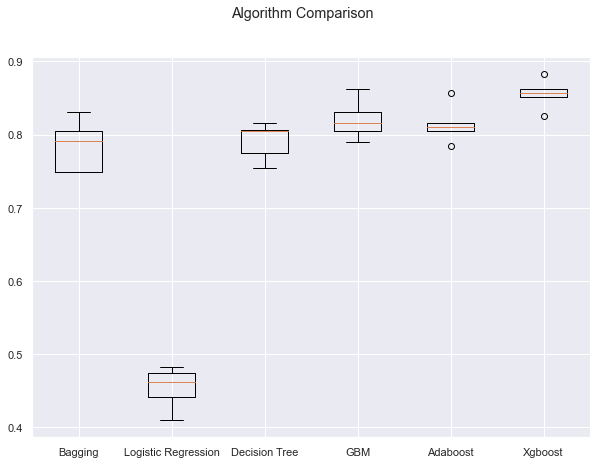

<IPython.core.display.Javascript object>

In [407]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that XGBoost is giving the highest cross-validated recall followed by GradientBoosting
- The boxplot shows that the performance of GradientBoosting is consistent with no outlier
- Logistic Regression is the less performing model among the six models

**Model building - Oversampled data using SMOTE**

In [408]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 27)
After Oversampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

In [409]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names1 = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results1.append(cv_result)
    names1.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 96.86212934634109
Logistic Regression: 82.05532144162866
Decision Tree: 94.62641189940155
GBM: 97.11712751832823
Adaboost: 96.03842675441129
Xgboost: 98.74488637456945

Training Performance:

Bagging: 99.84310649146892
Logistic Regression: 80.50598156501275
Decision Tree: 100.0
GBM: 98.09766620906059
Adaboost: 96.4698960580506
Xgboost: 100.0


<IPython.core.display.Javascript object>

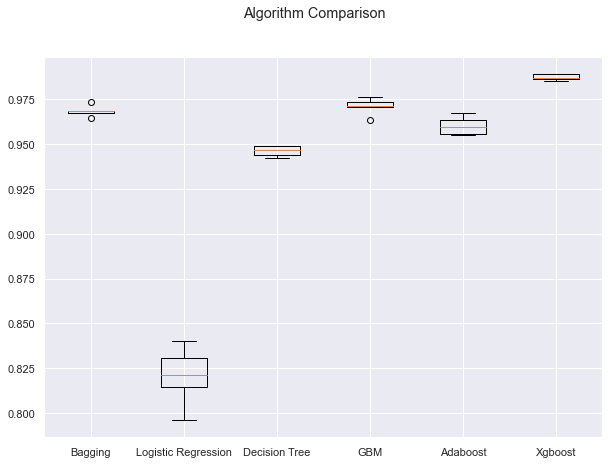

<IPython.core.display.Javascript object>

In [410]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names1)

plt.show()

- We can see that XGBoost is giving the highest cross-validated recall followed by GradientBoosting
- The boxplot shows that the performance of XGBoost is consistent with no outlier
- Logistic Regression is still the less performing model among the six models

**Model building - Undersampled data using Random Under Sampler**

In [411]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 27)
After Undersampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

In [412]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results2 = []  # Empty list to store all model's CV scores
names2 = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results2.append(cv_result)
    names2.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 90.9848246991104
Logistic Regression: 81.45525902668759
Decision Tree: 88.93249607535321
GBM: 94.05808477237049
Adaboost: 93.54788069073784
Xgboost: 95.49241234955522

Training Performance:

Bagging: 98.97540983606558
Logistic Regression: 82.27459016393442
Decision Tree: 100.0
GBM: 97.95081967213115
Adaboost: 95.38934426229508
Xgboost: 100.0


<IPython.core.display.Javascript object>

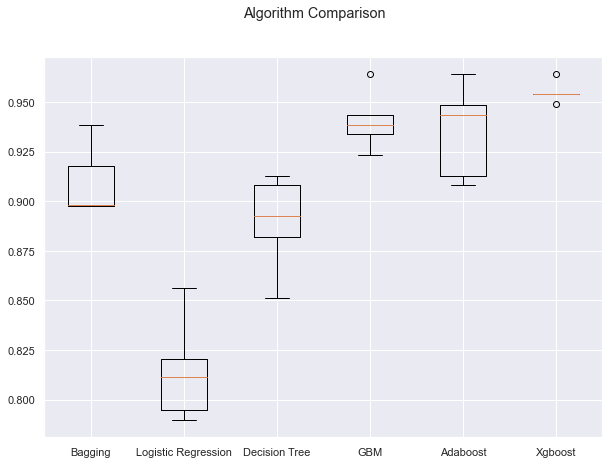

<IPython.core.display.Javascript object>

In [413]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names2)

plt.show()

- We can see that XGBoost is giving the highest cross-validated recall followed by Adaboost
- The boxplot shows that the performance of Adaboost is consistent with no outlier
- Logistic Regression is still the less performing model among the six models

### Hyperparameter tuning using random search

* Using RamdomizedSearchCV, we will tune xgboost for the first model built, GBM for the oversampled model built (even though xgboost is the best) and xgboost for the undersampled model built. We will also compare the performance 

**First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

The following model performance classification function will return the accuracy, recall, precision and F1 score. 

In [414]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

The following function will return the confusion matrix for a model

In [415]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

**Randomized Search**

###   xgboost for the first model built 

In [416]:
%%time 

# defining model
model = XGBClassifier(random_state=1, eval_metric="logloss")


# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10],
            "colsample_bytree": [0.5, 0.7, 0.9, 1],
            "colsample_bylevel": [0.5, 0.7, 0.9, 1],
           }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned1 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned1.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned1.best_params_,xgb_tuned1.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 5, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5} with CV score=0.9702878074306647:
Wall time: 26.8 s


<IPython.core.display.Javascript object>

In [417]:
# building model with best parameters
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=1,
    learning_rate=0.1,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

**Checking model performance**

On the Training set

Training performance:
   Accuracy  Recall  Precision    F1
0     0.716   0.951      0.356 0.518
*************************************


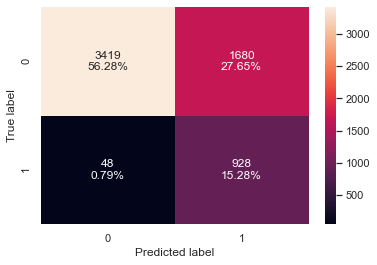

<IPython.core.display.Javascript object>

In [418]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned1, X_train, y_train
)
print("Training performance:")
print(xgboost_random_train)

print("*************************************")


# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_train, y_train)

**Insight:**
- On the training set, model performs very well on Recall. Accuracy is not very too bad but F1 and Precision are low.

On the validation set

valing performance:
   Accuracy  Recall  Precision    F1
0     0.718   0.945      0.357 0.519
*************************************


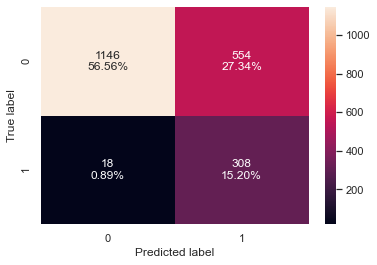

<IPython.core.display.Javascript object>

In [419]:
# Calculating different metrics on val set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("valing performance:")
print(xgboost_random_val)

print("*************************************")


# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_val, y_val)

**Insight:**
- With this first model, the performance are very close both on the train and validation sets.
- The model seems to generalize well

###   Gradient Boosting Model (GBM) for the oversampled model built

In [420]:
%%time 

# defining model
model_over_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Parameter grid to pass in GridSearchCV

parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbm_over_tuned = RandomizedSearchCV(estimator=model_over_tuned, param_distributions=parameters, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
gbm_over_tuned = gbm_over_tuned.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(gbm_over_tuned.best_params_,gbm_over_tuned.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 175, 'max_features': 0.8, 'max_depth': 10} with CV score=0.9803919644403394:
Wall time: 2min 34s


<IPython.core.display.Javascript object>

**Checking model performance**

On the training set

Training performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
*************************************


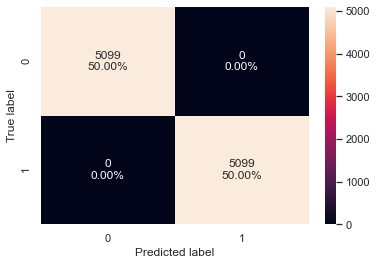

<IPython.core.display.Javascript object>

In [421]:
# Calculating different metrics on train set
gbm_over_tuned_train_perf = model_performance_classification_sklearn(
    gbm_over_tuned, X_train_over, y_train_over
)
print("Training performance:")
gbm_over_tuned_train_perf

print(gbm_over_tuned_train_perf)

print("*************************************")


# creating confusion matrix
confusion_matrix_sklearn(gbm_over_tuned, X_train_over, y_train_over)

On the validation set

Training performance:
   Accuracy  Recall  Precision    F1
0     0.962   0.908      0.863 0.885
*************************************


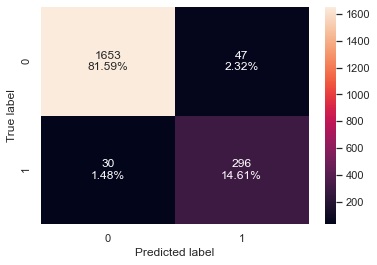

<IPython.core.display.Javascript object>

In [422]:
# Calculating different metrics on validation set
gbm_over_tuned_val_perf = model_performance_classification_sklearn(
    gbm_over_tuned, X_val, y_val
)
print("Training performance:")
gbm_over_tuned_train_perf

print(gbm_over_tuned_val_perf)

print("*************************************")


# creating confusion matrix
confusion_matrix_sklearn(gbm_over_tuned, X_val, y_val)

**Insight:**
- With the Gradient Descent Boosting Model, Accuracy is very good on both training and validation sets. Recall decrease but still very high. Precision and F1 increased very well. But the model is overfitting.

### xgboost for the undersampled model built

In [423]:
%%time 

# defining model
model2 = XGBClassifier(random_state=1, eval_metric="logloss")


# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10],
            "colsample_bytree": [0.5, 0.7, 0.9, 1],
            "colsample_bylevel": [0.5, 0.7, 0.9, 1],
           }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model2, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5} with CV score=1.0:
Wall time: 10.5 s


<IPython.core.display.Javascript object>

In [424]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=1,
    learning_rate=0.1,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned2.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

**Checking model performance**

On the training set

Training performance:
   Accuracy  Recall  Precision    F1
0     0.648   1.000      0.587 0.740
*************************************


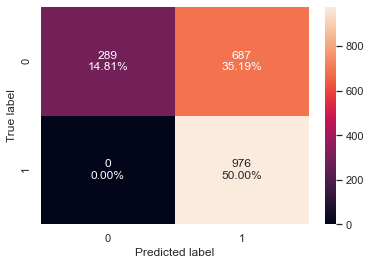

<IPython.core.display.Javascript object>

In [425]:
# Calculating different metrics on train set
xgboost_under_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train_un, y_train_un
)
print("Training performance:")
print(xgboost_under_train)

print("*************************************")


# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_train_un, y_train_un)

On the validation set

Validation performance:
   Accuracy  Recall  Precision    F1
0     0.401   1.000      0.212 0.349
*************************************


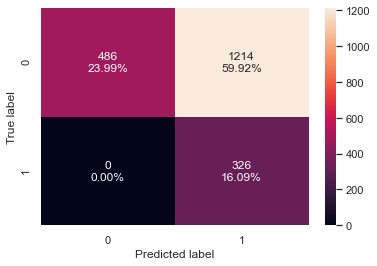

<IPython.core.display.Javascript object>

In [426]:
# Calculating different metrics on validation set
gbm_under_tuned_val_perf = model_performance_classification_sklearn(
    xgb_tuned2, X_val, y_val
)
print("Validation performance:")

print(gbm_under_tuned_val_perf)

print("*************************************")


# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

**Insight:**
With xgboost for the undersampled model built, the Recall on both training and validation set is the same and is very very high. Accuracy, Precision and F1 decrease severly on the validation set compared to the training set.
As False Negative is the parameter we want to minimize, the model does not overfit and generalized very well.

####  Observations
- Tuning the models with RamdomSearchCV gives us very high Recall on both training and validation sets on each model
- The performance of each model is not really similar. The GDM model overfits whereas the xgboost models are not

###  Comparing all models

In [427]:
# training performance comparison

models_train_comp_df = pd.concat(
    [xgboost_random_train.T, gbm_over_tuned_train_perf.T, xgboost_under_train.T,],
    axis=1,
)
models_train_comp_df.columns = [
    "xgboost Tuned",
    "gdm oversampled Tuned",
    "Xgboost undersampled Tuned",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


xgboost Tuned  gdm oversampled Tuned  Xgboost undersampled Tuned
Accuracy           0.716                  1.000                       0.648
Recall             0.951                  1.000                       1.000
Precision          0.356                  1.000                       0.587
F1                 0.518                  1.000                       0.740

<IPython.core.display.Javascript object>

In [428]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [xgboost_random_val.T, gbm_over_tuned_val_perf.T, gbm_under_tuned_val_perf.T,],
    axis=1,
)
models_val_comp_df.columns = [
    "xgboost Tuned",
    "gdm oversampled Tuned",
    "Xgboost undersampled Tuned",
]
print("Vlidation performance comparison:")
models_val_comp_df

Vlidation performance comparison:


xgboost Tuned  gdm oversampled Tuned  Xgboost undersampled Tuned
Accuracy           0.718                  0.962                       0.401
Recall             0.945                  0.908                       1.000
Precision          0.357                  0.863                       0.212
F1                 0.519                  0.885                       0.349

<IPython.core.display.Javascript object>

####  Observations

- Adaboost model is overfitting
- On comparing CV scores, the training score and the validation score, Xgboost undersampled Tuned model tuned using Random search is giving the best results.
- We'll go ahead with Xgboost undersampled Tuned

###  Performance on the test set

In [429]:
# Calculating different metrics on the test set
xgboost_grid_test = model_performance_classification_sklearn(xgb_tuned2, X_test, y_test)
print("Test performance:")
xgboost_grid_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.393   1.000      0.209 0.346

<IPython.core.display.Javascript object>

- The recall on the test set is still 1, precision and accuracy are still very low.

### Feature Importance Using Sklearn 

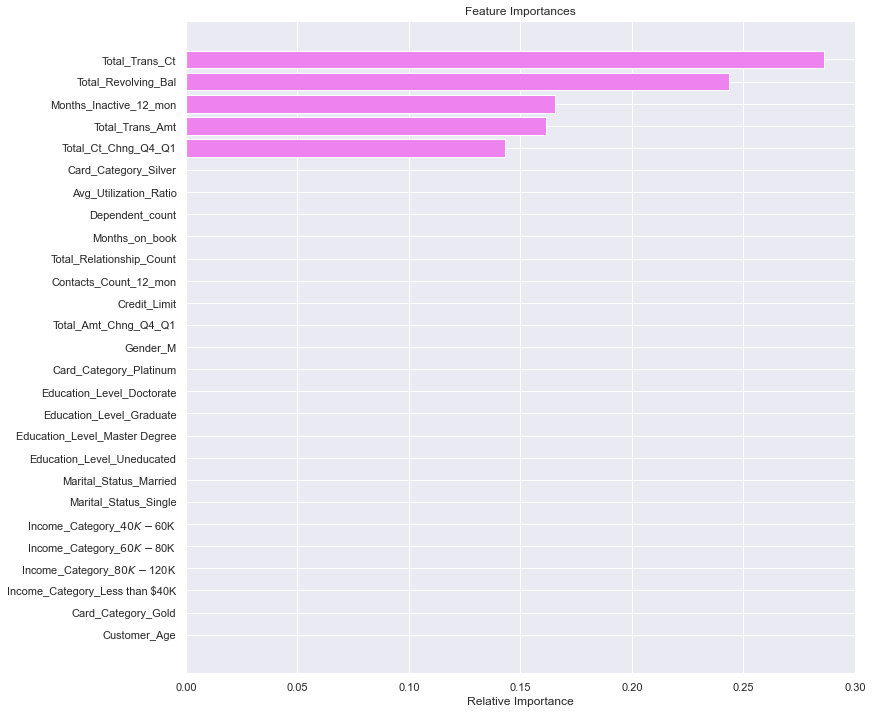

<IPython.core.display.Javascript object>

In [430]:
feature_names = X_train.columns
importances = xgb_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

####  Observations 
- Total Transaction Count `Total_Trans_Ct` in the 12 last months is the most important feature, followed by `Total_Revolving_Bal` and `Months_Inactive_12_mon`.

### Let's explore the contribution of features in making the prediction by exploring the "SHAP" package

* SHAP stands for SHapley Additive exPlanations.
* SHAP makes the sophisticated machine learning models easy to understand.
* We need to be sure of what our model is actually predicting, for that we have to take a closer look at each variable and SHAP open up the possibilities to explore which variables were intensely used by the model to make predictions. 
* It is a great tool that tell us how each feature in the model has contributing to the predictions. 
* It helps in visualizing the relationships in the model

### import the "SHPA" package

In [431]:
import shap

<IPython.core.display.Javascript object>

In [432]:
## Initialize the package
shap.initjs()

<IPython.core.display.Javascript object>

#### Calculating the shap values

In [433]:
explainer = shap.TreeExplainer(xgb_tuned2)
shap_values = explainer.shap_values(X_train)

<IPython.core.display.Javascript object>

###   Shap summary plot 
- The Y-axis indicates the variable names, arranged in order of importance from top to bottom.
- The X-axis indicates the Shap value.
- For every variable, the dot represents an observation
- The color represents the value of the feature from low to high.
- The farther away from the values from the central line(SHAP = 0), the more impact that variable will have on predictions

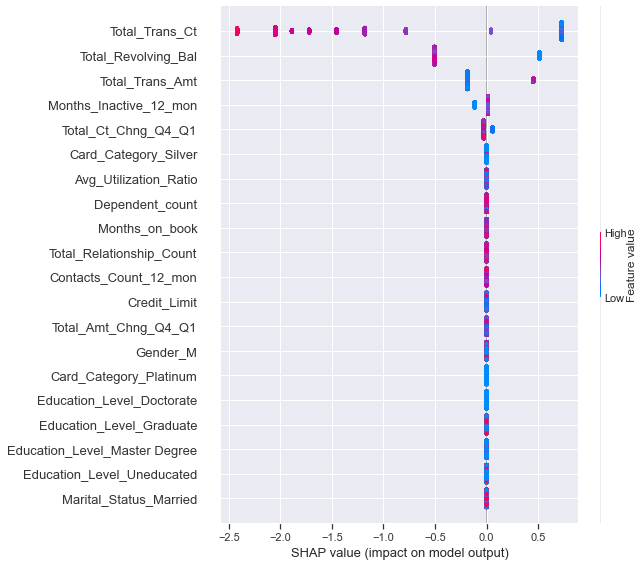

<IPython.core.display.Javascript object>

In [434]:
# Make plot.
shap.summary_plot(shap_values, X_train)

#### <span style="color:blue">  Observations </span>
* `Total_Trans_Ct`, `Total_Revolving_Bal` and `Total_Trans_Amt` are the top three important features that contributes in the prediction of target.
* `Total_Trans_Ct` and `Total_Revolving_Bal` have high negative impact on the Attrition_Flag as lower the values of Total_Trans_Ct and Total_Revolving_Bal, higher the chance of leaving the credit's card services
* `Total_Trans_Amt` has a positif impact on the Attrition_Flag i.e higher the value of Total_Trans_Amt, higher the chance to keep the credit's card services



#### Let's look at one specific observation to get deeper insights

###  Force Plot 
- Force plot can be informative in understanding the contribution of each variable in the prediction of a given observation. 
- The output f(x) is the score predicted by the model for a given observation. 
- Higher scores lead the model to make the predictions closer to 1 and low scores make the predictions closer to 0
- Features in red color influence positively i.e make the predictions closer to 1, whereas blue color influence negatively. 
- Base value is the mean prediction value by the model. 
- Features that had more impact on the score are located closer to the dividing boundary between red and blue. 
- The impact of each feature is represented by the size of the bar. 

In [435]:
### Exploring an individual observation
shap.force_plot(explainer.expected_value, shap_values[1, :], X_train.iloc[1, :])

<IPython.core.display.Javascript object>

#### <span style="color:blue">  Observations </span>
- The model predicts 2.41 score for the given observation
- `Total_Trans_Ct` has a positive impact on the prediction i.e influences the model to predict a score greater than 2 
- `Total_Revolving_Bal` and `Total_Trans_Amt` have a negative impact on the prediction i.e influences the model to predict a score closer to 2.

#####   Observations 

###  Pipelines for productionizing the model 

- Pipeline is a means of automating the machine learning workflow by enabling data to be transformed and correlated into a model that can then be analyzed to achieve outputs. This type of ML pipeline makes the process of inputting data into the ML model fully automated. 

- Now, we have a final model. let's use pipelines to put the model into production

###   Column Transformer 
* We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
* Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

In [436]:
# Replacint values abc with NaN values
data["Income_Category"] = data["Income_Category"].replace(["abc"], np.nan)

# creating a list of numerical variables
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent"))]
)

# creating a list of categorical variables
categorical_features = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]


# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

<IPython.core.display.Javascript object>

In [437]:
# Separating target variable and other variables
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [438]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 18) (2026, 18) (2026, 18)


<IPython.core.display.Javascript object>

In [439]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                subsample=1,
                learning_rate=0.05,
                gamma=0,
                eval_metric="logloss",
                reg_lambda=10,
                max_depth=1,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                

<IPython.core.display.Javascript object>

**Function to display the maximum items of our predictions**

In [440]:
from contextlib import contextmanager


@contextmanager
def show_complete_array():
    oldoptions = np.get_printoptions()
    np.set_printoptions(threshold=np.inf)
    try:
        yield
    finally:
        np.set_printoptions(**oldoptions)

<IPython.core.display.Javascript object>

In [441]:
# transforming and predicting on validation data
model_val = model.predict(X_val)

<IPython.core.display.Javascript object>

In [442]:
with show_complete_array():
    print(model_val)  # shows the complete array

print(model_val)  # shows the truncated array (again)

[1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0
 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0
 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1
 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1
 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1
 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1
 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 1 0 1 1 1 0 0 

<IPython.core.display.Javascript object>

In [443]:
# transforming and predicting on test data
model_test = model.predict(X_test)

<IPython.core.display.Javascript object>

In [444]:
with show_complete_array():
    print(model_test)  # shows the complete array

print(model_test)  # shows the truncated array (again)

[0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1
 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1
 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0
 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0
 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1
 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0
 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 

<IPython.core.display.Javascript object>

In [445]:
# Mean of numerical variables grouped by attrition
creditCard.groupby(["Attrition_Flag"])[numerical_cols].mean()

Customer_Age  Dependent_count  Months_on_book  \
Attrition_Flag                                                     
Attrited Customer        46.659            2.403          36.178   
Existing Customer        46.262            2.335          35.881   

                   Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                        
Attrited Customer                     3.280                   2.693   
Existing Customer                     3.915                   2.274   

                   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Attrition_Flag                                                                
Attrited Customer                  2.972      8136.039              672.823   
Existing Customer                  2.356      8726.878             1256.604   

                   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
Attrition_Flag                                                              
Attrited Customer         7463.216                 0.694         3095.026   
Existing Customer         7470.273                 0.773         4654.656   

                   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                                                 
Attrited Customer          44.934                0.554                  0.162  
Existing Customer          68.673                0.742                  0.296

<IPython.core.display.Javascript object>

### Business Recommendations 

- Bank’s marketing policy is fuzzy and is not at all targeted. Every customer, regardless of their income category, can hold the type of credit card they want. Therefore, the bank must design and deploy a differentiated or even a multi-segment marketing campaign, offering differentiated products according to the expectations of each customers segment.
- Globally, Marital status doen't play a decisive part on the decision to leave the credit card's services but Education level does. Graduate and plus abandonned the credit card's services. The bank should customize its offers to attract more graduates and plus customers.
- The bank should should better calibrate the amplitude of credit limits according to the income class of clients, find ways to get in touch with them quite often
- The bank should set up a customer incentive system based on customer loyalty
- Total_Ct_Chng_Q4_Q1 is one of the most important features of our model. Therefore, the bank should monitor this indicator and encourage customers to complete a large number of their transactions in the fourth and first quarters
- ~53% of bank customers are women and approx 59% of customers who forego bank card services are also women. To prevent the bank's female customers from stopping using their credit cards, the bank must adapt its offers based on gender-related constraints.









